## ANALYSE LOGEMENTS VACANTS DU PARC PRIVÉ (Département du Nord - 59)

### 1- Mise en place du Dataset 

In [1]:
#Libraries
import pandas as pd #managing dataframes
import numpy as np #to perform calculations 
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting

In [2]:
### Importing the datasets
# You may need to update the relative files path if they are no longer in the same folder as the current directory
df20 = pd.read_csv(r".\lov20_final.csv")
df_zonage = pd.read_excel(r".\Zonage_abc_communes_2022.xlsx")
df_parcelles = pd.read_excel(r".\parcelles_et_sections_d59.xlsx")


In [3]:
##Création du code commune dans df20 pour jointure
df20['code_com'] = df20['ccodep'].astype(str) + df20['commune'].map('{:0>3d}'.format)

##Formatage du code commune dans df_zonage
df_zonage["Code Commune"] = df_zonage["Code Commune"].astype(str)

##Filtre sur le 59
df_zonage_59 = df_zonage[df_zonage["Code Commune"].str.startswith('59')]

## Jointure des 3 tables
df_new = df20.set_index('code_com').join(df_zonage_59.set_index('Code Commune'), how = 'left')
df_new = df_new.reset_index()
df_new = df_new.rename(columns = {'index' : 'code_commune'})
df_new = df_new.drop(columns=['Nom Commune '], axis = 1)
df_new = df_new.set_index('invariant').join(df_parcelles.set_index('invariant'), how = 'left')
df_new = df_new.reset_index()

df20 = df_new


### 2- Préparation des données

* Aperçu du dataset
* Statistiques de base sur les colonnes
* Gestion des nulls
* Premier traitement d'outliers

In [4]:
##display settings : to see all the fields
pd.set_option('display.max_columns', 100)
df20.head(10)

,invariant,code_commune,ccodep,intercommunalite,card_epci,commune,libcom,ff_idsec,ff_idbat,ff_x,ff_y,ff_x_4326,ff_y_4326,nature,ff_dcapec2,ff_stoth,ff_slocal,ratio_habitable,ff_npiece_p2,ff_dnbbai,ff_dnbdou,ff_dnbwc,etage,ff_ndroit,ff_ctpdl,since_construction,since_debut_vacance,since_last_mutation,anmutation,vlcad,vl_2020,txtlv,vl_au_m2_habitable,zone_tendue,anrefthlv,potentiel_thlv_tlv,identite_prop,age_proprio,prop_genre,nb_logements_meme_proprio,groupe,ff_catpro2txt,ff_catpro3,ff_locprop,gest_pas_prop,label,Zone ABC,nb_LV_parcelle,nb_log_parcelle,nb_LV_section,nb_log_section
0,I0010000095X,59001,59,L017,1715,1,ABANCOURT,590010000U,590010000U1339A,715185.112499,7.014946e+06,3.212573,50.232334,MAISON,6,173,197,87.82,5,1,0,2,0.0,1,Aucune,95,36,205.0,20/12/2002,370,2023,0.0,11.69,0,2017,1,LE CALVE FI,-1,N,1,0,SOCIETE CIVILE A VOCATION IMMOBILIERE,G1a,1,0,1,C,1.0,12.0,8,116
1,I0010000032Z,59001,59,L017,1715,1,ABANCOURT,590010000U,590010000U1578A,715391.773317,7.015315e+06,3.215480,50.235644,APPART,6,110,190,57.89,5,1,0,0,0.0,1,Aucune,150,36,33.0,10/04/2017,261,1427,0.0,12.97,0,2018,1,SCI 20 RUE DES FRESNOIS,-1,N,1,0,SOCIETE CIVILE A VOCATION IMMOBILIERE,G1a,1,0,1,C,1.0,12.0,8,116
2,I0010000117E,59001,59,L017,1715,1,ABANCOURT,590010000U,590010000U1389B,715071.640349,7.015147e+06,3.210992,50.234147,MAISON,6,90,345,26.09,3,0,0,1,0.0,1,Aucune,97,72,55.0,30/06/2015,305,1667,0.0,18.52,0,2016,0,VALBAMA,-1,N,1,0,SOCIETE CIVILE A VOCATION IMMOBILIERE,G1d,1,0,1,C,1.0,12.0,8,116
3,I0010000012M,59001,59,L017,1715,1,ABANCOURT,590010000U,590010000U1174A,715073.667784,7.015343e+06,3.211027,50.235903,MAISON,6,98,199,49.25,4,1,1,0,0.0,1,Aucune,100,60,47.0,26/02/2016,285,1560,0.0,15.92,0,2017,1,LOURDAULT/SABRINA 01/12/1972,48,F,1,-1,PERSONNE PHYSIQUE,X1a,2,0,1,C,1.0,12.0,8,116
4,I0010000028E,59001,59,L017,1715,1,ABANCOURT,590010000U,590010000U1212A,715204.872688,7.015319e+06,3.212863,50.235682,MAISON,8,45,45,100.00,2,0,0,0,0.0,1,Aucune,98,300,349.0,28/12/1990,47,256,0.0,5.69,0,1995,0,VILLAIN/ELISABETH MARIE THERESE 19/01/1959,61,F,1,-1,PERSONNE PHYSIQUE,X1a,1,0,1,C,1.0,12.0,8,116
5,I0010000104Z,59001,59,L017,1715,1,ABANCOURT,590010000U,590010000U1360A,715152.311147,7.015063e+06,3.212118,50.233391,MAISON,7,80,105,76.19,3,0,0,0,0.0,2,Aucune,98,300,408.0,01/01/1986,98,537,0.0,6.71,0,1995,1,SEGARD/SEVERINE PRUDENCE 02/10/1920,100,F,1,-1,PERSONNE PHYSIQUE,X1a,1,0,1,C,1.0,12.0,8,116
6,I0010000109C,59001,59,L017,1715,1,ABANCOURT,590010000U,590010000U1369A,715196.446595,7.015156e+06,3.212739,50.234220,MAISON,5,160,289,55.36,5,0,0,0,0.0,1,Aucune,100,300,600.0,01/01/1970,486,2657,0.0,16.61,0,1995,1,GAUTIER/THERESE BERTHE EMILIE 30/03/1930,90,M,1,-1,PERSONNE PHYSIQUE,X1a,1,0,1,C,1.0,12.0,8,116
7,I0010000120D,59001,59,L017,1715,1,ABANCOURT,590010000U,590010000U1396A,715108.181979,7.015182e+06,3.211505,50.234454,MAISON,6,114,370,30.81,4,1,1,1,0.0,1,Aucune,120,48,40.0,07/09/2016,328,1793,0.0,15.73,0,2017,1,TRUY/LUDOVIC JEAN LOUIS EDOUARD 22/09/1988,32,M,1,-1,PERSONNE PHYSIQUE,X1a,2,0,1,C,1.0,12.0,8,116
8,I0011122195J,59001,59,L017,1715,1,ABANCOURT,59001000ZL,59001000ZL0144A,714976.257297,7.014711e+06,3.209640,50.230229,MAISON,5,117,160,73.13,6,1,1,2,0.0,2,Aucune,8,36,9.0,03/04/2019,536,2932,0.0,25.06,0,2020,0,COURTIN/STEPHANE CYRIL 17/04/1985,35,M,1,-1,PERSONNE PHYSIQUE,X1a,-1,0,0,C,1.0,47.0,1,60
9,I0020000826D,59002,59,L012,2539,2,ABSCON,59002000AH,59002000AH0204A,721465.578557,7.026284e+06,3.301096,50.333955,MAISON,6,100,200,50.00,3,0,1,0,0.0,1,Aucune,120,60,4.0,03/09/2019,501,2741,0.0,27.41,0,2020,0,SCI REMY DUQUESNOY DENAIN,-1,N,2,0,SOCIETE CIVILE A VOCATION IMMOBILIERE,G1a,-1,0,0,B2,1.0,8.0,13,166


In [6]:
# Columns formatting
df20['groupe'] = df20['groupe'].astype(str)
df20['commune'] = df20['commune'].astype(str)

In [7]:
#Overview on the original dataset
df20.info()
df20.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30683 entries, 0 to 30682
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   invariant                  30683 non-null  object 
 1   code_commune               30683 non-null  object 
 2   ccodep                     30683 non-null  int64  
 3   intercommunalite           30683 non-null  object 
 4   card_epci                  30683 non-null  int64  
 5   commune                    30683 non-null  object 
 6   libcom                     30683 non-null  object 
 7   ff_idsec                   30683 non-null  object 
 8   ff_idbat                   30683 non-null  object 
 9   ff_x                       30661 non-null  float64
 10  ff_y                       30661 non-null  float64
 11  ff_x_4326                  30661 non-null  float64
 12  ff_y_4326                  30661 non-null  float64
 13  nature                     30683 non-null  obj

Index(['invariant', 'code_commune', 'ccodep', 'intercommunalite', 'card_epci',
       'commune', 'libcom', 'ff_idsec', 'ff_idbat', 'ff_x', 'ff_y',
       'ff_x_4326', 'ff_y_4326', 'nature', 'ff_dcapec2', 'ff_stoth',
       'ff_slocal', 'ratio_habitable', 'ff_npiece_p2', 'ff_dnbbai',
       'ff_dnbdou', 'ff_dnbwc', 'etage', 'ff_ndroit', 'ff_ctpdl',
       'since_construction', 'since_debut_vacance', 'since_last_mutation',
       'anmutation', 'vlcad', 'vl_2020', 'txtlv', 'vl_au_m2_habitable',
       'zone_tendue', 'anrefthlv', 'potentiel_thlv_tlv', 'identite_prop',
       'age_proprio', 'prop_genre', 'nb_logements_meme_proprio', 'groupe',
       'ff_catpro2txt', 'ff_catpro3', 'ff_locprop', 'gest_pas_prop', 'label',
       'Zone ABC', 'nb_LV_parcelle', 'nb_log_parcelle', 'nb_LV_section',
       'nb_log_section'],
      dtype='object')

In [8]:
#Specifiying the fields being used for this analysis
## Each line represents a categorie of fields, specified in comments at the end of the line.

X = df20[[   'intercommunalite','card_epci','ff_idsec', 'ff_idbat', ## geolocalisation du logement
          'nature','ff_dcapec2', 'ff_stoth', 'ff_slocal', 'ratio_habitable', 'ff_npiece_p2', 'ff_dnbbai', 'ff_dnbdou', 'ff_dnbwc',  'etage', 'ff_ndroit', 'ff_ctpdl', 'since_construction','since_debut_vacance', 'since_last_mutation', ## caractéristiques propres du logement
          'vl_2020','vl_au_m2_habitable','zone_tendue','Zone ABC', 'potentiel_thlv_tlv', ##valeur locative et fiscalité
           'age_proprio','prop_genre', 'nb_logements_meme_proprio','groupe', 'ff_catpro2txt', 'ff_catpro3','ff_locprop','gest_pas_prop', ##caractéristiques du propriétaire
          'nb_LV_parcelle', 'nb_log_parcelle', 'nb_LV_section','nb_log_section', # pour évaluer taux de vacance sur site, parcelle et section
          'label' ## pour les stats descriptives 
         ]]
Y = df20['label']

In [9]:
#Gestion des nulls
## Replace nulls with the median value, not the mean because affected by the outliers
pd.options.mode.chained_assignment = None
X.loc[:,'since_last_mutation']=X['since_last_mutation'].fillna(X['since_last_mutation'].median())
X.loc[:,'nb_LV_parcelle']=X['nb_LV_parcelle'].fillna(X['nb_LV_parcelle'].median())
X.loc[:,'nb_log_parcelle']=X['nb_log_parcelle'].fillna(X['nb_log_parcelle'].median())
X.loc[:,'etage']=X['etage'].fillna(X['etage'].median())

In [ ]:
#Gestion des outliers détectés plus bas, pour les colonnes since_construction, since_debut_vacance et since_last_mutation

#Méthode 1 : supprimer les valeurs aberrantes, en utilisant l'écart normalisé à la moyenne (ou z_score)
'''
from scipy import stats


mask1 = np.abs(stats.zscore(X['since_construction'])) < 3
mask2 = np.abs(stats.zscore(X['since_debut_vacance'])) < 3
mask3 = np.abs(stats.zscore(X['since_last_mutation'])) < 3

X = X[mask1] #add  mask2 & mask3 for deleting outliers for since_debut_vacance and since_last_mutation 
X.describe().round(2)
'''


In [10]:
#Méthode 2 : Détection en utilisant l'écart interquartile
q3 = X['since_construction'].quantile(0.75)
q1 = X['since_construction'].quantile(0.25)
EIQ_construction =  q3-q1
mask_sup = (X['since_construction'] > q3+1.5*EIQ_construction) # Alternative > X['since_construction'].quantile(0.95)
mask_inf = (X['since_construction'] < q1-1.5*EIQ_construction) # ou < X['since_construction'].quantile(0.05)

X.loc[:, 'since_construction'][mask_sup] = np.max(X['since_construction'][~mask_sup]) 
X.loc[:, 'since_construction'][mask_inf] = np.min(X['since_construction'][~mask_inf])
X.describe().round(2)

,card_epci,ff_dcapec2,ff_stoth,ff_slocal,ratio_habitable,ff_npiece_p2,ff_dnbbai,ff_dnbdou,ff_dnbwc,etage,ff_ndroit,since_construction,since_debut_vacance,since_last_mutation,vl_2020,vl_au_m2_habitable,zone_tendue,potentiel_thlv_tlv,age_proprio,nb_logements_meme_proprio,ff_locprop,gest_pas_prop,nb_LV_parcelle,nb_log_parcelle,nb_LV_section,nb_log_section,label
count,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30678.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00
mean,4024.98,5.88,67.05,101.82,78.29,2.99,0.43,0.32,0.84,0.75,1.51,108.28,87.06,175.57,1699.88,28.36,0.21,0.72,43.15,5.29,1.23,0.01,2.66,11.77,33.71,550.22,0.75
std,3215.39,0.83,43.31,84.62,22.28,1.70,0.51,0.50,0.51,2.99,0.89,57.02,67.41,153.67,1142.64,14.72,0.40,0.45,32.73,17.53,1.69,0.09,6.59,55.05,42.32,528.13,0.43
min,137.00,3.00,1.00,1.00,0.31,0.00,0.00,0.00,0.00,0.00,1.00,1.00,36.00,1.00,10.00,1.35,0.00,0.00,-1.00,1.00,-1.00,0.00,1.00,0.00,1.00,1.00,0.00
25%,1715.00,5.00,37.00,42.00,59.52,2.00,0.00,0.00,1.00,0.00,1.00,65.00,36.00,51.00,958.00,18.77,0.00,0.00,-1.00,1.00,-1.00,0.00,1.00,1.00,8.00,225.00,0.00
50%,2539.00,6.00,60.00,82.00,83.54,3.00,0.00,0.00,1.00,0.00,1.00,111.00,60.00,136.00,1443.00,25.41,0.00,1.00,49.00,1.00,1.00,0.00,1.00,1.00,18.00,404.00,1.00
75%,8850.00,6.00,86.00,137.00,100.00,4.00,1.00,1.00,1.00,1.00,2.00,140.00,108.00,256.00,2142.00,34.95,0.00,1.00,69.00,2.00,2.00,0.00,2.00,5.00,40.00,721.00,1.00
max,8850.00,8.00,725.00,1441.00,100.00,33.00,5.00,11.00,11.00,88.00,6.00,252.00,360.00,721.00,22060.00,925.00,1.00,1.00,151.00,159.00,9.00,1.00,76.00,914.00,260.00,5224.00,1.00


In [ ]:
#Méthode 3 : Détection en utilisant les 5th & 95th percentiles
'''
mask_sup = (X['since_construction'] > X['since_construction'].quantile(0.95))
mask_inf = (X['since_construction'] < X['since_construction'].quantile(0.05))
X['since_construction'] = np.where(mask_sup, X['since_construction'].quantile(0.95), X['since_construction'] )
X['since_construction'] = np.where(mask_inf, X['since_construction'].quantile(0.05), X['since_construction'] )
X.describe().round(2)
'''

In [11]:
# Outliers valeur locative au mètre carré habitable

mask_sup = (X['vl_au_m2_habitable'] > X['vl_au_m2_habitable'].quantile(0.75)+ 2.5*(X['vl_au_m2_habitable'].quantile(0.75) - X['vl_au_m2_habitable'].quantile(0.25)))
mask_inf = (X['vl_au_m2_habitable'] < X['vl_au_m2_habitable'].quantile(0.25)- 2.5*(X['vl_au_m2_habitable'].quantile(0.75) - X['vl_au_m2_habitable'].quantile(0.25)))

X['vl_au_m2_habitable'] = np.where(mask_sup, np.max(X['vl_au_m2_habitable'][~mask_sup]), X['vl_au_m2_habitable'])
X['vl_au_m2_habitable'] = np.where(mask_inf, np.min(X['vl_au_m2_habitable'][~mask_inf]), X['vl_au_m2_habitable'])
X.describe().round(2)

,card_epci,ff_dcapec2,ff_stoth,ff_slocal,ratio_habitable,ff_npiece_p2,ff_dnbbai,ff_dnbdou,ff_dnbwc,etage,ff_ndroit,since_construction,since_debut_vacance,since_last_mutation,vl_2020,vl_au_m2_habitable,zone_tendue,potentiel_thlv_tlv,age_proprio,nb_logements_meme_proprio,ff_locprop,gest_pas_prop,nb_LV_parcelle,nb_log_parcelle,nb_LV_section,nb_log_section,label
count,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30678.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00
mean,4024.98,5.88,67.05,101.82,78.29,2.99,0.43,0.32,0.84,0.75,1.51,108.28,87.06,175.57,1699.88,28.23,0.21,0.72,43.15,5.29,1.23,0.01,2.66,11.77,33.71,550.22,0.75
std,3215.39,0.83,43.31,84.62,22.28,1.70,0.51,0.50,0.51,2.99,0.89,57.02,67.41,153.67,1142.64,13.11,0.40,0.45,32.73,17.53,1.69,0.09,6.59,55.05,42.32,528.13,0.43
min,137.00,3.00,1.00,1.00,0.31,0.00,0.00,0.00,0.00,0.00,1.00,1.00,36.00,1.00,10.00,1.35,0.00,0.00,-1.00,1.00,-1.00,0.00,1.00,0.00,1.00,1.00,0.00
25%,1715.00,5.00,37.00,42.00,59.52,2.00,0.00,0.00,1.00,0.00,1.00,65.00,36.00,51.00,958.00,18.77,0.00,0.00,-1.00,1.00,-1.00,0.00,1.00,1.00,8.00,225.00,0.00
50%,2539.00,6.00,60.00,82.00,83.54,3.00,0.00,0.00,1.00,0.00,1.00,111.00,60.00,136.00,1443.00,25.41,0.00,1.00,49.00,1.00,1.00,0.00,1.00,1.00,18.00,404.00,1.00
75%,8850.00,6.00,86.00,137.00,100.00,4.00,1.00,1.00,1.00,1.00,2.00,140.00,108.00,256.00,2142.00,34.95,0.00,1.00,69.00,2.00,2.00,0.00,2.00,5.00,40.00,721.00,1.00
max,8850.00,8.00,725.00,1441.00,100.00,33.00,5.00,11.00,11.00,88.00,6.00,252.00,360.00,721.00,22060.00,75.33,1.00,1.00,151.00,159.00,9.00,1.00,76.00,914.00,260.00,5224.00,1.00


In [ ]:
# Outliers valeurs locatives 
'''
mask_sup = (X['vl_2020'] > X['vl_2020'].quantile(0.75)+ 2.5*(X['vl_2020'].quantile(0.75) - X['vl_2020'].quantile(0.25)))
mask_inf = (X['vl_2020'] < X['vl_2020'].quantile(0.25)- 2.5*(X['vl_2020'].quantile(0.75) - X['vl_2020'].quantile(0.25)))

X['vl_2020'] = np.where(mask_sup, np.max(X['vl_2020'][~mask_sup]), X['vl_2020'])
X['vl_2020'] = np.where(mask_inf, np.min(X['vl_2020'][~mask_inf]), X['vl_2020'])
X.describe().round(2)
'''

### Remarques
- Les 3 variables vl_2020, vl_au_m2_habitable et ff_stoth étant parfaitement correlées, 2 suffisent totalement à capter l'information qu'elles renferment. Nous choisirons pour cette analyse **vl_au_m2_habitable et ff_stoth**
- De même avec, ff_stoth, ff_slocal et ratio_habitable, nous ne conserverons que **ff_stoth et ratio_habitable**
- La détection et gestion d'outliers ne se fera que sur les données sélectionnées
- La variable **etage** n'est que très peu fiable, donc nous l'exclurons de l'analyse. Cependant, dans des métropoles où on a une forte présence de batiments à plusieurs niveaux, cette variable peut être déterminante ! 


### 3- Statistiques descriptives

<AxesSubplot:xlabel='intercommunalite', ylabel='Count'>

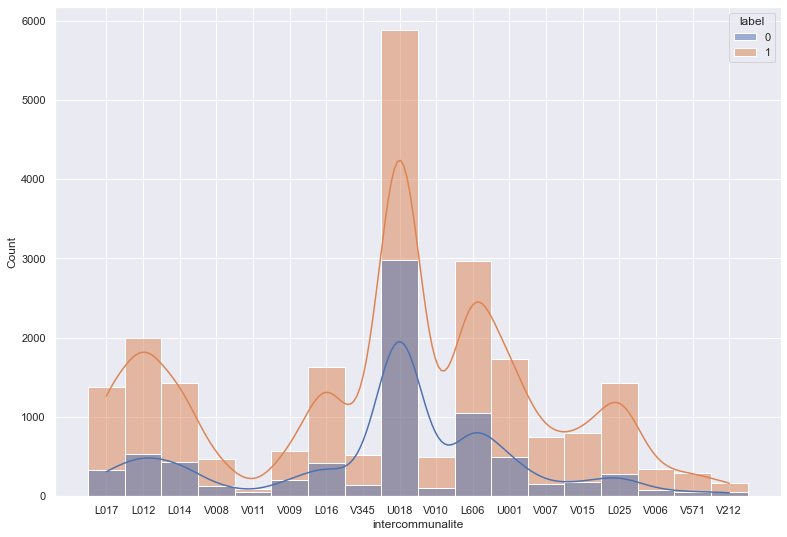

In [12]:
#adjsuting plotting parameters
sns.set(rc={'figure.figsize':(13,9)})

### 1- Intercommunalité : effectif et proportion de vacance dans chaque epci
sns.histplot(data = X, x = 'intercommunalite',  hue = 'label', kde=True)

### Analyse 

Le plot ci dessus nous permet d'avoir 
- Une répartition des logements vacants par epci. On observe par exemple que les epci U018 (où se trouve la métropole Lille, ainsi que les communes de Roubaix, Tourcoing... ), et L606 (Valenciennes, ...), ont les plus grand décompte de logement vacants. On pourrait donc penser des actions orientées en priorité sur les epci aux plus grands effectifs dans le parc vacant privé.
- D'identifier les epci avec le ratio logements_sortis_de_vacance/ceux_restés les plus élevés : On identifie en l'occurence U018, L606, L014, U001... 

La table ci-après nous permet d'avoir une meilleure vue sur les ratios de sortie de vacance par intercommunalité, ordonnés par ratio décroissant. 
* Il serait probablement pertinent de s'intéresser aux actions (s'il y'en a eues) menées par les autorités de ces epci, afin d'identifier les politiques qu'ils ont pu mettre en oeuvre pour influer les taux de sortie de vacance dans leurs intercommunalités. 
* S'intéresser également à des facteurs propres à ces epci, comme le niveau d'emploi, la qualité de vie, les activités économiques, le niveau de mobilité, --le niveau de sécurité--, ...


In [13]:
## Proportion de sortie de vacance pour chaque epci
ratio_par_intercommunalite = 100-((100*df20[['intercommunalite','label']].groupby('intercommunalite').sum().rename(columns={'intercommunalite':'intercommunalite','label' : 'ratio_sortie_vacance'})/
df20[['intercommunalite','label']].groupby('intercommunalite').count().rename(columns={'intercommunalite':'intercommunalite','label' : 'ratio_sortie_vacance'})).sort_values(by=['ratio_sortie_vacance'])).round(2)
ratio_par_intercommunalite 

,ratio_sortie_vacance
intercommunalite,
V011,35.77
U018,33.60
V009,26.63
L606,26.21
V212,23.56
L014,23.28
V008,22.44
U001,22.32
V345,22.17


Text(0.5, 1.0, 'Répartition du parc par niveaux de confort')

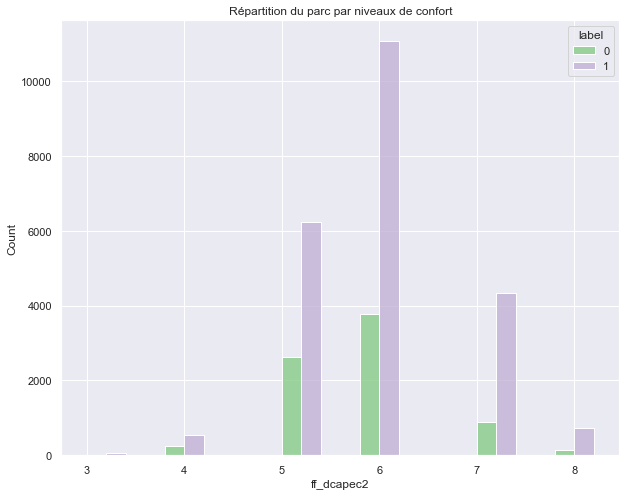

In [14]:
### 2 - ff_capec2
## Répartition du parc en fonction du niveau de confort
sns.set(rc={'figure.figsize':(10,8)})
sns.histplot(data = X, x = 'ff_dcapec2',  hue = 'label',multiple="dodge", palette = "Accent",binwidth = 0.4).set_title('Répartition du parc par niveaux de confort')

### Commentaire
* Cet histogramme nous indique déjà que les logements avec le ratio de sortie de vacance le plus haut sont ceux de moyen confort, ie 4, 5 et 6.

In [207]:
def strates_confort (x) :
    if 1<= x <= 4 :
        return "haut_confort_1_a_4"
    elif 5<= x <= 6 :
        return "moyen_confort_5_a_6"
    elif 7<= x <= 8 :
        return "bas_confort_7_a_8"

X['Strates_ff_dcapec2'] = X['ff_dcapec2'].apply(strates_confort)

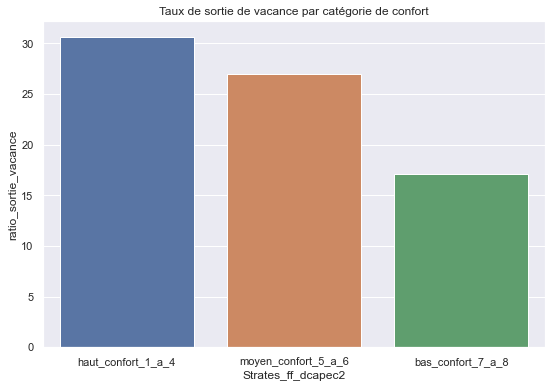

In [208]:
## Bar plot - taux de sortie de vacance par strate de confort
ratio_ff_confort= 100-((100*X[['Strates_ff_dcapec2','label']].groupby('Strates_ff_dcapec2').sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
X[['Strates_ff_dcapec2','label']].groupby('Strates_ff_dcapec2').count().rename(columns={'label' : 'ratio_sortie_vacance'})).round(2)).sort_values(by=['ratio_sortie_vacance'])

plt.figure(figsize=(9,6))
plt.title("Taux de sortie de vacance par catégorie de confort")
ax = sns.barplot(data = ratio_ff_confort, x = ratio_ff_confort.index, y ='ratio_sortie_vacance' )
plt.show()

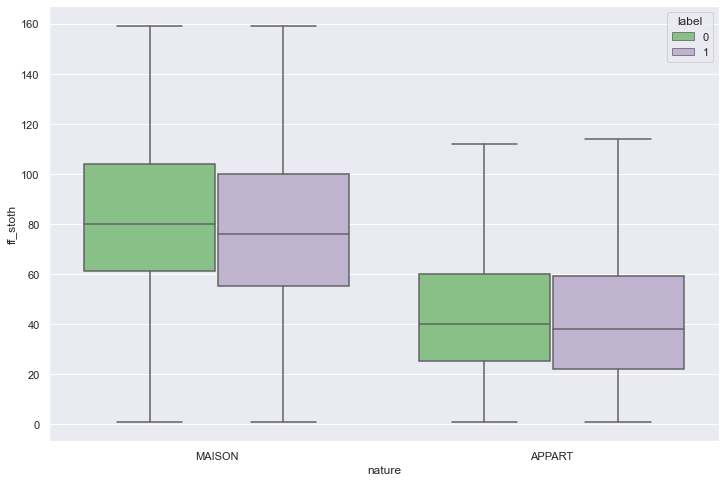

In [198]:
### 3- Surface totale habitable 

## Méthodes de détection d'outliers univariées : boxplots
sns.set(rc={'figure.figsize':(12,8)})
ax=sns.boxplot(data = X, y = 'ff_stoth',  x = "nature",  hue = 'label', palette = "Accent", showfliers = False)

In [18]:
## Gestion des outliers
q3 = X['ff_stoth'].quantile(0.75)
q1 = X['ff_stoth'].quantile(0.25)
EIQ_construction =  q3-q1
mask_sup = (X['ff_stoth'] > q3+1.5*EIQ_construction) #Outliers valeurs supérieures
mask_inf = (X['ff_stoth'] < q1-1.5*EIQ_construction) #Les outliers en valeurs inférieures

X.loc[:, 'ff_stoth'][mask_sup] = np.max(X['ff_stoth'][~mask_sup]) 
X.loc[:, 'ff_stoth'][mask_inf] = np.min(X['ff_stoth'][~mask_inf])

In [19]:
## Fonction de mapping stoth
def strates_stoth (x) :
    if x < 40 :
        return "moins_de_40"
    elif 40<= x < 60 :
        return "de_40_a_60"
    elif 60<= x < 100:
        return "de_60_a_100"
    elif 100 <= x < 200 :
        return "de_100_a_200"
    else:
        return "not_classified"

X['Strates_ff_stoth'] = X['ff_stoth'].apply(strates_stoth)

### Commentaire
- Ce box-and-whisker plot ne prend pas en compte les outliers (< 1st quartile - 1.5*IQR or > 3rd quartile + 1.5*IQR). Pour les afficher, changer le paramètre 'showfliers' à True
- Pour les maisons, on observe une répartition des logements sortis de vacance légèrement au dessus de ceux resté vacants, bien que la différence ne soit pas significative. Ainsi, on peut s'attendre à ce que les logements avec une plus grande surface habitable aient plus de chance de sortie de vacance.

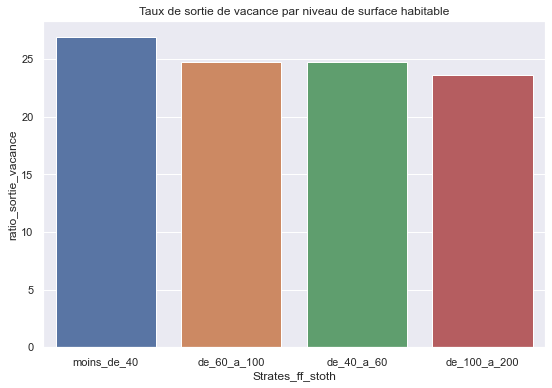

In [20]:
## Bar plot - taux de sortie de vacance par niveau de surface habitable
ratio_Strates_ff_stoth= 100-((100*X[['Strates_ff_stoth','label']].groupby('Strates_ff_stoth').sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
X[['Strates_ff_stoth','label']].groupby('Strates_ff_stoth').count().rename(columns={'label' : 'ratio_sortie_vacance'})).round(2)).sort_values(by=['ratio_sortie_vacance'])

plt.figure(figsize=(9,6))
plt.title("Taux de sortie de vacance par niveau de surface habitable")
ax = sns.barplot(data = ratio_Strates_ff_stoth, x = ratio_Strates_ff_stoth.index, y ='ratio_sortie_vacance')
plt.show()

La surface totale du local quand à elle n'indique rien à priori sur les chances de sortie de vacance, comme on peut le voir sur les plots ci-dessous

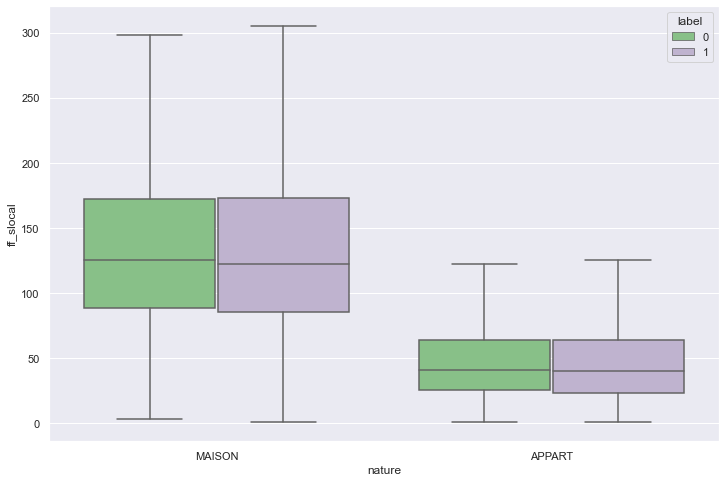

In [21]:
# 4- Surface totale
sns.set(rc={'figure.figsize':(12,8)})
ax=sns.boxplot(data = X, y = 'ff_slocal',  x = "nature",  hue = 'label', palette = "Accent", showfliers = False)

## Non considérée dans l'entraînement

In [22]:
## 5- (Ajout d'un nouveau champs) surface_dep
X['surface_dep'] =  X['ff_slocal'] - X['ff_stoth']

<AxesSubplot:>

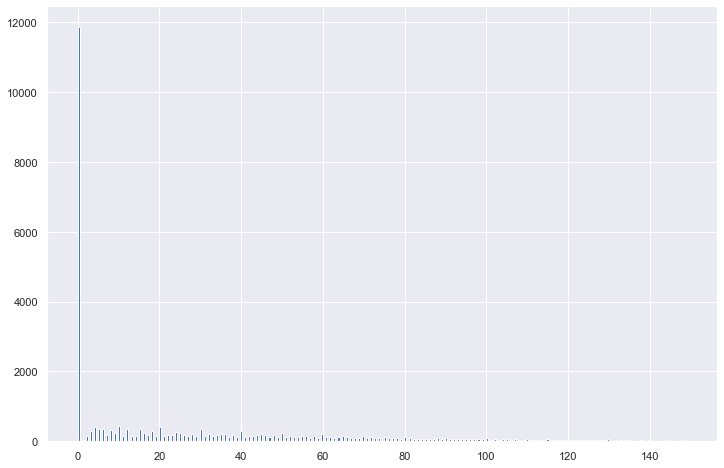

In [23]:
X[X['surface_dep']<150]['surface_dep'].hist(bins = 300)

In [24]:
##Fonction de mapping 
def strates_surface_dep (x) :
    if x == 0 :
        return "aucune"
    elif 0< x <= 15 :
        return "de_0_a_15"
    elif 15< x <= 50:
        return "de_15_a_50"
    elif x > 50 :
        return "plus_de_50"
    else :
        return "not_classified"

X['Strates_surface_dep'] = X['surface_dep'].apply(strates_surface_dep)

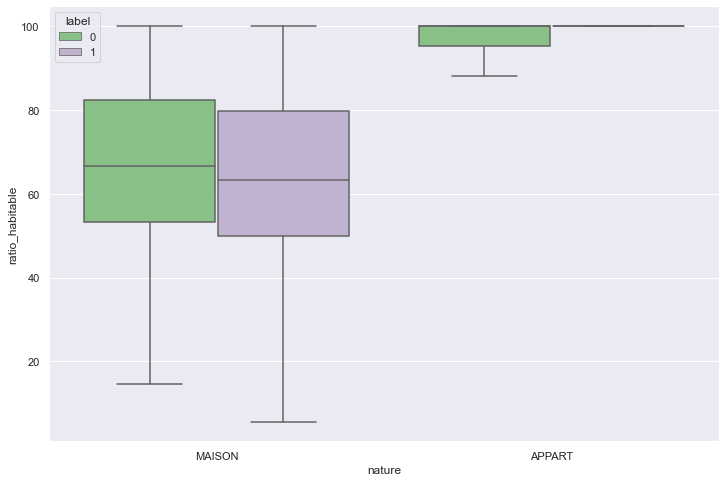

In [25]:
# 6- Ratio_habitable
sns.set(rc={'figure.figsize':(12,8)})
ax=sns.boxplot(data = X, y = 'ratio_habitable',  x = "nature",  hue = 'label', palette = "Accent",showfliers = False)

### Commentaire
* Les maisons avec un plus grand ratio habitable ont visiblement plus de chances de quitter la vacance; Ceci peut se justifier par le fait que, bien qu'on pourrait croire que les surfaces non habitables ont une plus faible valeur locative et sont moins taxables que les surfaces d'habitation, elles rajoutent quand même un coût clairement non négligeable à la valeur locative du bien.
* On voit par ailleurs que pour les apparts, les espaces terasses, balcons, externes sans excès restent plus attractifs car parmi les logements sortis de la vacance (en vert), une bonne fractio a un ratio_habitable dans ]88 , 100[

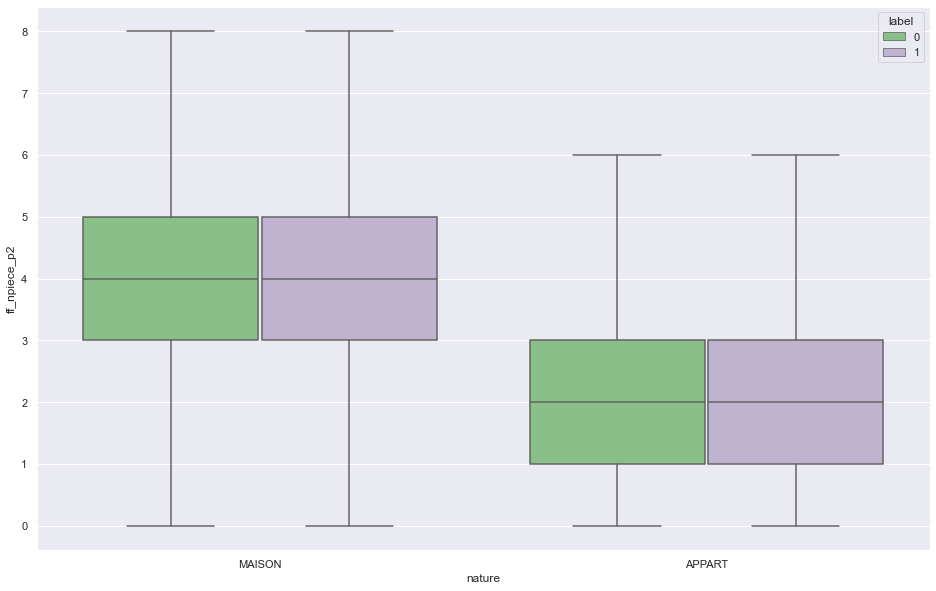

In [26]:
# 7 -Nb de pièces
sns.set(rc={'figure.figsize':(16,10)})
#sns.displot(data = X, x='ff_npiece_p2', kind="hist", hue = 'label')
ax=sns.boxplot(data = X, y = 'ff_npiece_p2',  x = "nature",  hue = 'label', palette = "Accent",showfliers = False)



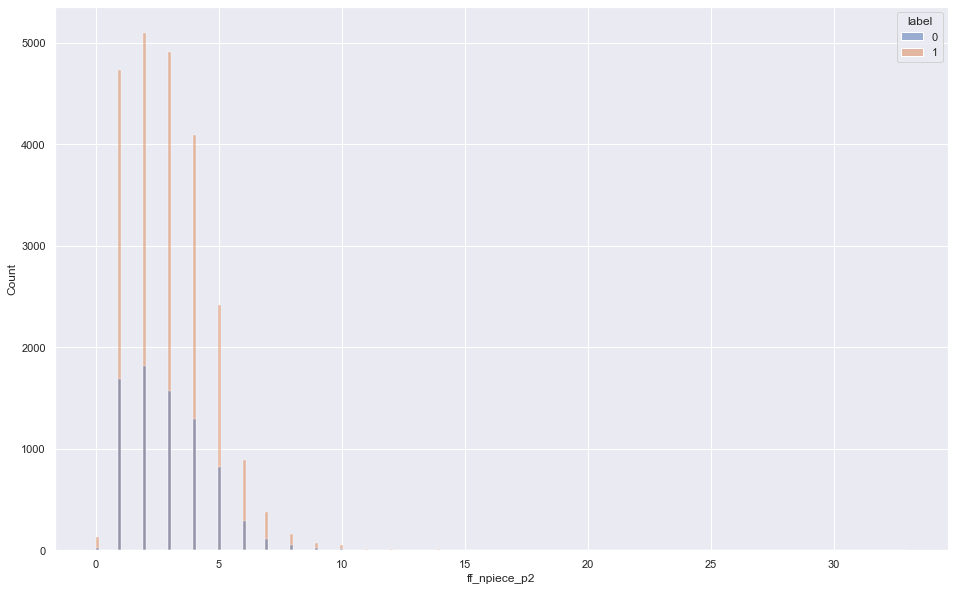

In [27]:
#Histogramme par nombre de pièces 
ax = sns.histplot(data = X, x = 'ff_npiece_p2',  hue = 'label')

- Box plot pas concluant, mais permettant d'identifier les outliers pour chaque type de logement(plus de 9 pièces pour les maisons, et plus de 6 pièces pour les apparts.
- L'histogramme quant à lui est peu lisible, donc on a réalisé une table illustrant les ratio de sortie de vacance par nombre de pièces 

In [28]:
# Ratio de sortie de vacance par nombre de pièces
100-((100*df20[['ff_npiece_p2','label']].groupby('ff_npiece_p2').sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
df20[['ff_npiece_p2','label']].groupby('ff_npiece_p2').count().rename(columns={'label' : 'ratio_sortie_vacance'})).round(2)).sort_values(by=['ratio_sortie_vacance'])

,ratio_sortie_vacance
ff_npiece_p2,
33,100.00
13,50.00
1,26.31
2,26.28
8,25.36
5,25.24
6,24.49
3,24.27
4,24.07


* On remarque que la proportion de logements sortis de vacance est plus élévée chez pour les logements avec un nombre modeste de pièces (On va faire comme si on n'a pas vu qu'il y a des logements à 0 pièces mdrrrr), c'est à dire de 1 à 9. Au delà, on peut penser qu'on a à faire à des demeures (voire chateaux ?) trop grandes et ayant une valeur trop élevée pour intéresser des demandeurs de logement.
* Le logement à 33 pièces et sorti de vacance ? C'est très objectivement un outlier. Peut mal-orienter nos résultats.


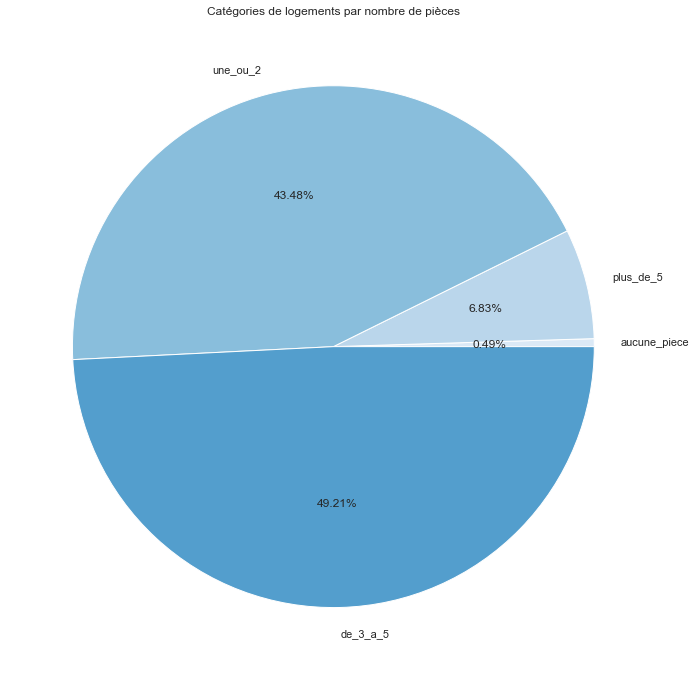

In [29]:
def strates_nb_pieces (x) :
    if x == 0 :
        return "aucune_piece"
    elif 1<= x <= 2 :
        return "une_ou_2"
    elif 3<= x < 6 :
        return "de_3_a_5"
    elif x >= 6 :
        return "plus_de_5"
    else :
        return "not_classified"

X['Strates_ff_npiece_p2'] = X['ff_npiece_p2'].apply(strates_nb_pieces)

tab_strat_nb_pieces = X[['Strates_ff_npiece_p2','label']].groupby('Strates_ff_npiece_p2').count().rename(columns={'label' : 'count'}).sort_values('count')
plt.figure(figsize = (12,12))
plt.title("Catégories de logements par nombre de pièces")
plt.pie(x = tab_strat_nb_pieces['count'], labels = tab_strat_nb_pieces.index, colors = sns.color_palette('Blues')[0:4], autopct='%.2f%%')
plt.show()

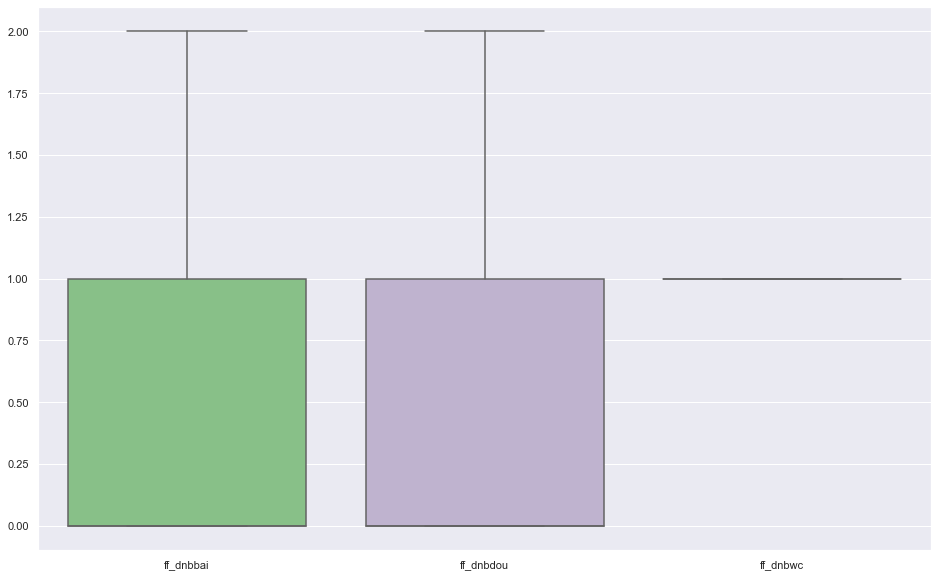

In [30]:
# 5- Douches, baignoires et WC
ax = sns.boxplot(data = X[['ff_dnbbai', 'ff_dnbdou', 'ff_dnbwc']] , palette = "Accent", showfliers = False)

In [31]:
X['nb_douch_bain'] = X["ff_dnbbai"]+X['ff_dnbdou']

In [32]:
## Stratifying nb_douch_bain
def strat_nb_douch_bain (x) :
    if x == 0 :
        return "pas_de_douche_ni_baignoire"
    elif x == 1 :
        return "une_seule"
    elif x == 2 :
        return "deux"
    elif (x==3 or x==4) :
        return "trois_ou_quatre"
    elif x >= 5 :
        return "au_moins_5"
    else :
        return "Not_classified"

X['strat_nb_douch_bain'] =  X['nb_douch_bain'].apply(strat_nb_douch_bain)

<AxesSubplot:xlabel='strat_nb_douch_bain', ylabel='ratio_sortie_vacance'>

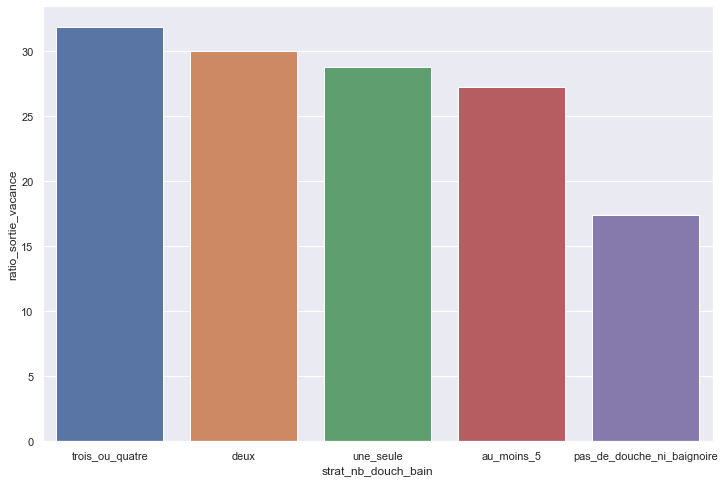

In [202]:
ratio_nb_sanitaire = 100 - 100*(X[['strat_nb_douch_bain', 'label']].groupby('strat_nb_douch_bain').sum()).rename(columns = {'label' : 'ratio_sortie_vacance'})/(X[['strat_nb_douch_bain', 'label']]).groupby('strat_nb_douch_bain').count().rename(columns = {'label' : 'ratio_sortie_vacance'})
ratio_nb_sanitaire = ratio_nb_sanitaire.sort_values('ratio_sortie_vacance', ascending = False)
sns.barplot(data = ratio_nb_sanitaire , x = ratio_nb_sanitaire.index , y = 'ratio_sortie_vacance')

### Commentaire
* Le diagramme montre que les logements avec entre 2 et 4 douches/baignores ont un taux de sortie de vacance plus élevé, ensuite viennent ceux ne possédant qu'un seul sanitaire.
* À partir de 5 douches/baignoires, on commence à avoir plus que nécessaire donc les logements deviennent certainement plus onéreux, et moins attractifs de la classe moyenne.
* Ce ratio chute drastiquement pour les logements n'ayant ni douche ni baignore (how is it even possible ?)

<AxesSubplot:xlabel='strat_nb_wc', ylabel='ratio_sortie_vacance'>

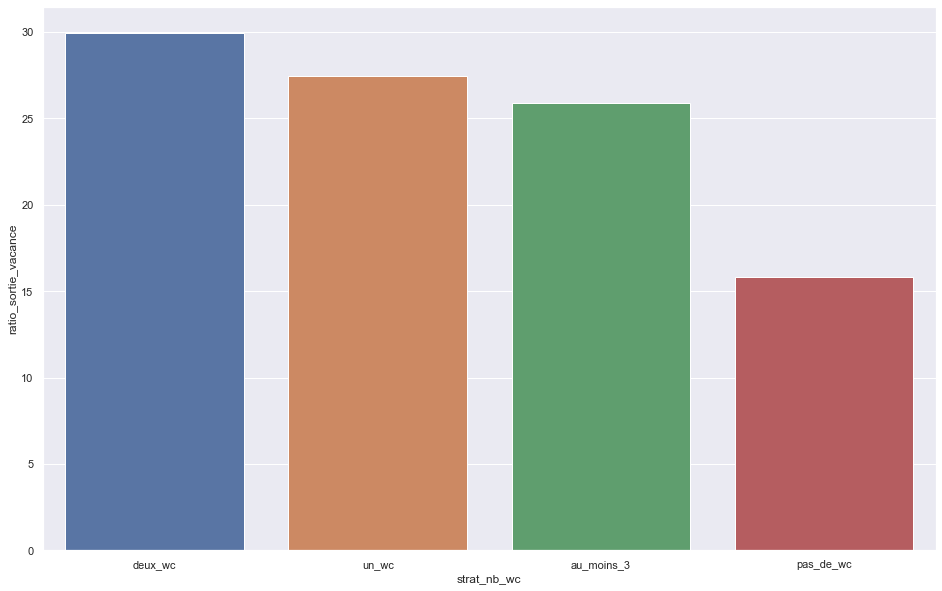

In [34]:
### nombre de wc
## On reprend le travail précédent 
## Attention, variable à fort déséquilibre, plus de 90% des logements vacants ont un seul wc 

## Stratifying nb_douch_bain
def strat_nb_wc (x) :
    if x == 0 :
        return "pas_de_wc"
    elif x == 1 :
        return "un_wc"
    elif x == 2 :
        return "deux_wc"
    elif x >= 3 :
        return "au_moins_3"
    else :
        return "Not_classified"

X['strat_nb_wc'] =  X['ff_dnbwc'].apply(strat_nb_wc)

ratio_nb_wc = 100 - 100*(X[['strat_nb_wc', 'label']].groupby('strat_nb_wc').sum()).rename(columns = {'label' : 'ratio_sortie_vacance'})/(X[['strat_nb_wc', 'label']]).groupby('strat_nb_wc').count().rename(columns = {'label' : 'ratio_sortie_vacance'})
ratio_nb_wc = ratio_nb_wc.sort_values('ratio_sortie_vacance', ascending = False)
sns.barplot(data = ratio_nb_wc , x = ratio_nb_wc.index , y = 'ratio_sortie_vacance')

### Commentaire
* À peu près les mêmes tendances que pour le nombre de douches/baignoires
- Les logements avec 2 wc semblent être plus attractifs
- Ensuite 1 viennent ceux avec 1 wc, acceptables mais pas les plus prisés on va dire
- À 3 wc et plus, on va vers l'opulence et les logements baissent en attractivité
- Pas de wc ? Sans commentaire 

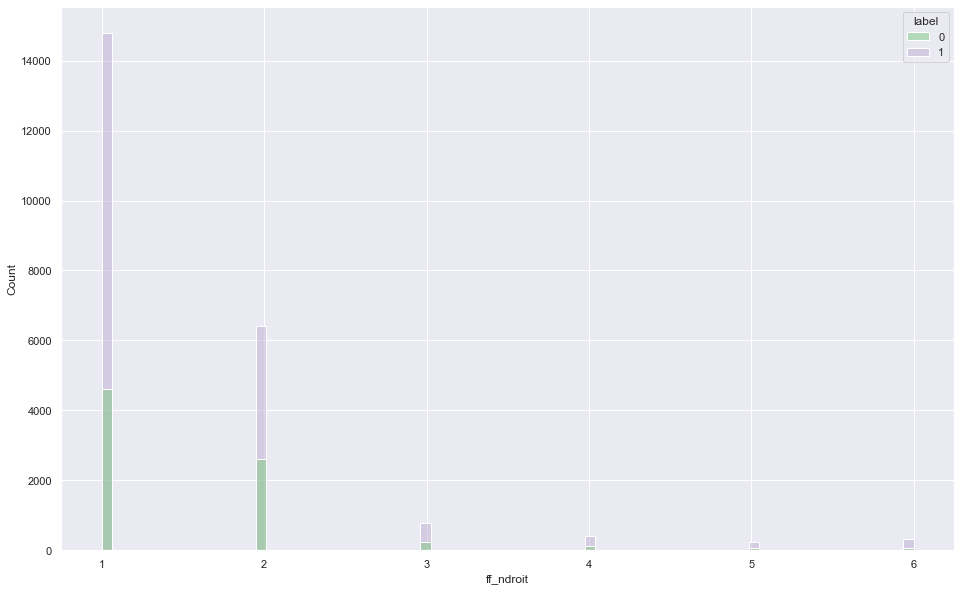

In [35]:
ax = sns.histplot(data = X, x = 'ff_ndroit',  hue = 'label', palette='Accent')

Le ratio de sortie de vacance est plus élevé parmi les logements à 2 droits; On peut faire une table de ratio comme précédemment pour mieux observer cette répartition;

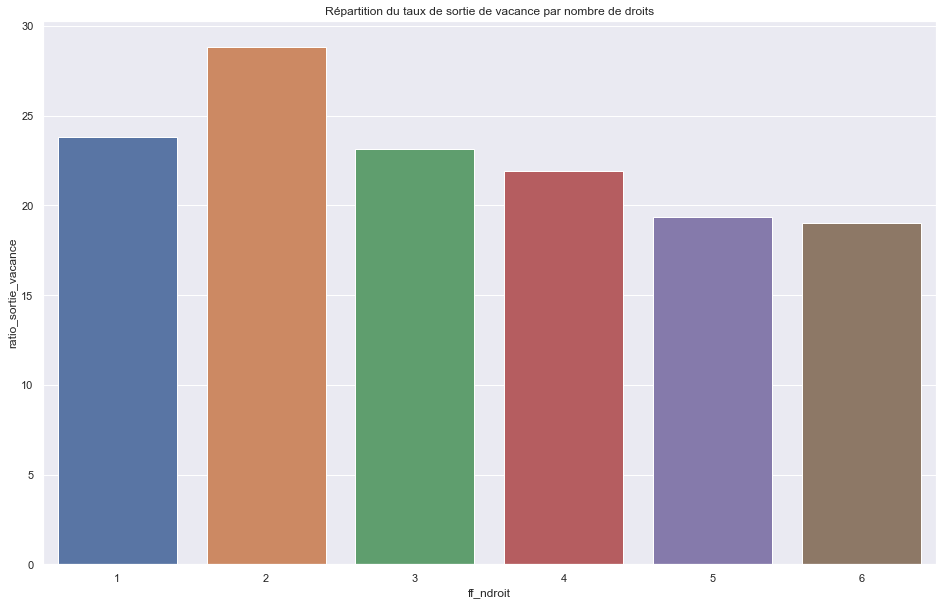

In [36]:
# Ratio de sortie de vacance 
ratio_nbdroit = 100-((100*df20[['ff_ndroit','label']].groupby('ff_ndroit').sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
df20[['ff_ndroit','label']].groupby('ff_ndroit').count().rename(columns={'label' : 'ratio_sortie_vacance'})).round(2)).sort_values(by=['ratio_sortie_vacance'])
colors = sns.color_palette('Blues_r')[0:6]
plt.title("Répartition du taux de sortie de vacance par nombre de droits")
sns.barplot(data = ratio_nbdroit, x = ratio_nbdroit.index, y = 'ratio_sortie_vacance')
plt.show()

In [37]:
ratio_nbdroit.index

Int64Index([2, 1, 3, 4, 5, 6], dtype='int64', name='ff_ndroit')

### Conclusion
* L'intuition selon laquelle plus le logement a un nombre de droits élevés et moins il a de chances de sortie de vacance est vérifiée à une exception près, le cas nb_droits = 2 : qui correspond for probablement aux couples propriétaires. 

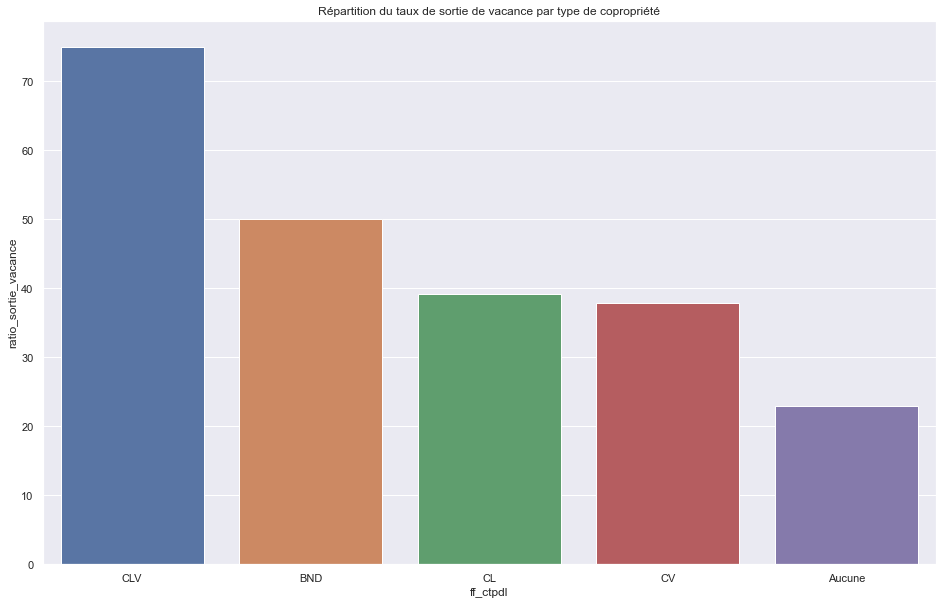

In [38]:
## Type de propriété

ratio_ff_ctpdl = 100-((100*df20[["ff_ctpdl",'label']].groupby("ff_ctpdl").sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
df20[["ff_ctpdl",'label']].groupby("ff_ctpdl").count().rename(columns={'label' : 'ratio_sortie_vacance'})).round(2)).sort_values(by=['ratio_sortie_vacance'])
plt.title("Répartition du taux de sortie de vacance par type de copropriété")
sns.barplot(data = ratio_ff_ctpdl, x = ratio_ff_ctpdl.index, y ='ratio_sortie_vacance' )
plt.show()

In [39]:
## Mapping 
def to_type_propriete (x) :
    if x == 'Aucune' :
        return 'Monopropriete'
    elif x == 'CL' : 
        return 'Propriete_en_lot'
    else :
        return 'Autre'
X['type_propriete'] = X['ff_ctpdl'].apply(to_type_propriete)


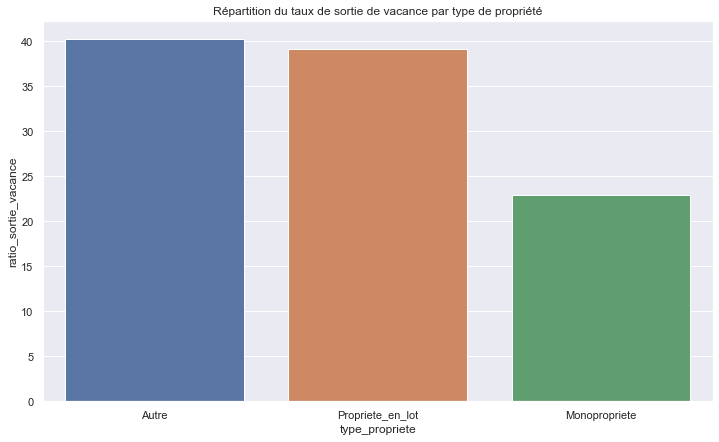

In [40]:
## Bar plot with the new stratification
ratio_type_propriete= 100-((100*X[["type_propriete",'label']].groupby("type_propriete").sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
X[["type_propriete",'label']].groupby("type_propriete").count().rename(columns={'label' : 'ratio_sortie_vacance'})).round(2)).sort_values(by=['ratio_sortie_vacance'])

plt.figure(figsize=(12,7))
plt.title("Répartition du taux de sortie de vacance par type de propriété")
ax = sns.barplot(data = ratio_type_propriete, x = ratio_type_propriete.index, y ='ratio_sortie_vacance' )
plt.show()

In [41]:
# Ratio de propriétes dans la catégorie "Autres"
100*X[X['type_propriete']=='Autre'].shape[0]/X.shape[0]

0.23465762800247694

### Commentaire
* La catégorie 'Autres' possède le taux de sortie de vacance le plus élevé, mais ne représente que 0.23% du parc de logements vacants, donc n'est que peu informative. 
* Par contre, ce diagramme nous montre que les copropriétés en lot ont plus de chances de sortir de la vacance que les monopropriétés. 

In [42]:
## .1 - Date de construction 
X['annee_construction'] = 2020 - X['since_construction'] 

## Mapping année construction
def strat_periode_construction (x) :
    if x < 1919 :
        return 'avant_1919'
    elif 1919 <= x < 1946 :
        return '1919_a_1946'
    elif 1946 <= x < 1991 : 
        return '1946_a_1991'
    elif x >= 1991 :
        return 'plus_de_1991'
    else :
        return 'Not_classified'
X['periode_construction'] = X['annee_construction'].apply(strat_periode_construction)


In [43]:
## .2 Durée depuis dernière mutation

def strat_since_last_mutation (x) :
    if x < 60 :
        return 'moins_de_5_ans'
    elif 60 <= x < 144 :
        return 'entre_5_et_12_ans'
    elif x >= 144 :
        return 'plus_de_12_ans'
    else :
        return 'Not_classified'
X['periode_mutation'] = X['since_last_mutation'].apply(strat_since_last_mutation)

In [95]:
## .3 Durée depuis debut vacance

def strat_since_debutvacance (x) :
    if x < 60 :
        return 'moins_de_5_ans'
    elif 60 <= x < 120 :
        return 'entre_5_et_10_ans'
    elif x >= 120 :
        return 'plus_de_10_ans'
    else :
        return 'Not_classified'
X['strat_debut_vacance'] = X['since_debut_vacance'].apply(strat_since_debutvacance)

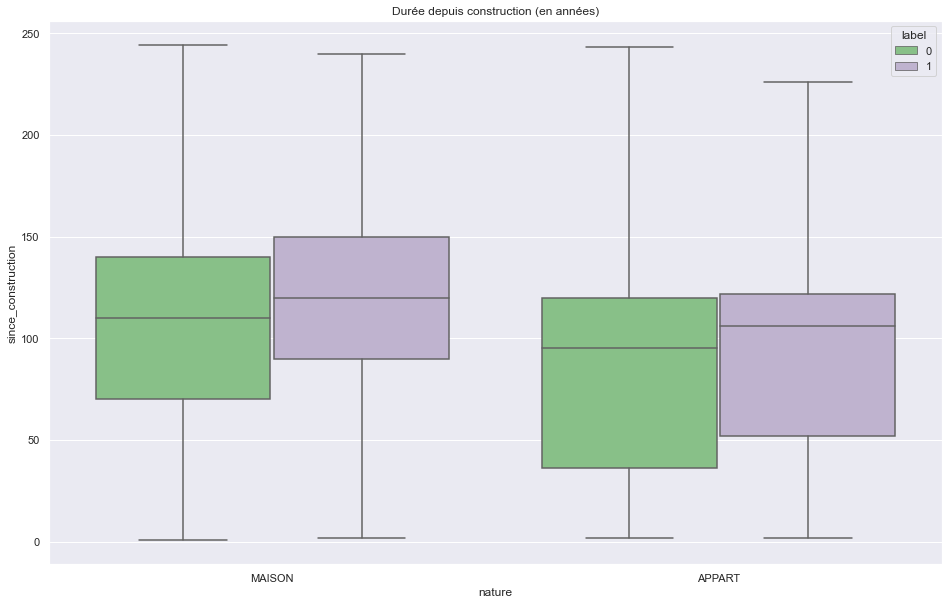

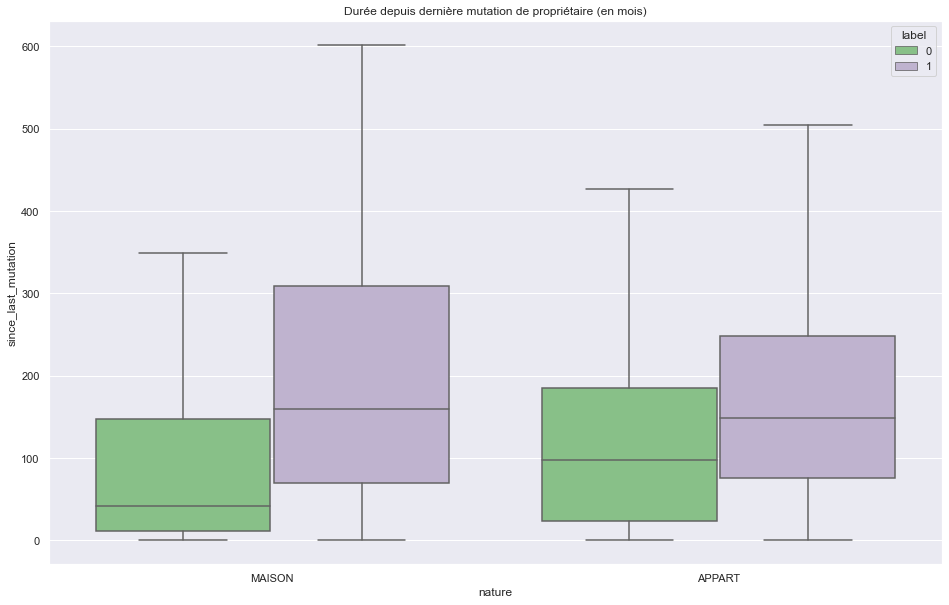

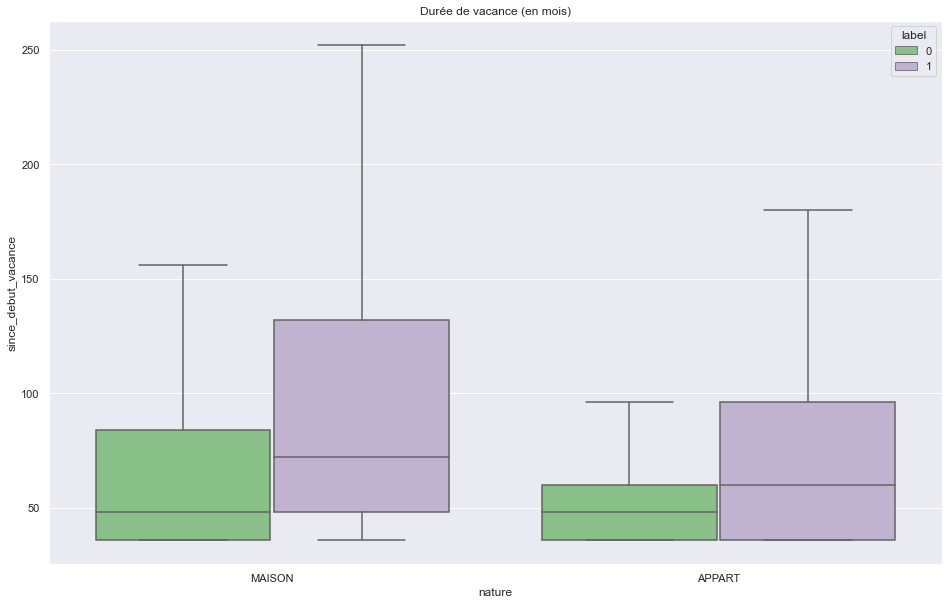

In [44]:

#Box_plots to detect 
plt.figure()
plt.title("Durée depuis construction (en années)")
sns.boxplot(data = X, x='nature', hue = 'label', y = 'since_construction', palette = 'Accent', showfliers = False)
plt.figure()
plt.title("Durée depuis dernière mutation de propriétaire (en mois)")
sns.boxplot(data = X, x='nature', hue = 'label', y = 'since_last_mutation', palette = 'Accent', showfliers = False)
plt.figure()
plt.title("Durée de vacance (en mois)")
sns.boxplot(data = X, x='nature', hue = 'label', y = 'since_debut_vacance', palette = 'Accent', showfliers = False)
plt.show(block =False)

* On a remarqué des outliers (logements ayant plus de 250 ans, voire 2000 ans), que nous avons géré plus haut lors de l'initialisation du dataset

Par ailleurs, ces boxplots nous indiquent que :
* Comme on aurait pu s'y attendre, les logements les moins ancients ont de meilleures chances de sortie de vacance
* La différence est encore plus significative quand il s'agit de la date de mutation : On peut conclure que les logements qui ont changé de propriétaires depuis pas trop longtemps ont plus de chance d'être revalorisés et remis en état, ou convertis en d'autres fins (magasins, commerces, bureaux, ...)
* Quant à la durée de vacance, on voit bien que plus un logement est innocupé depuis longtemps, moins il a de chances d'étre reoccupés. Sans doute ces locaux en questions nécessitent de grandes interventions pour rehabilitation, sans lesquels ils ne sont pas prêts de quitter le parc vacant.

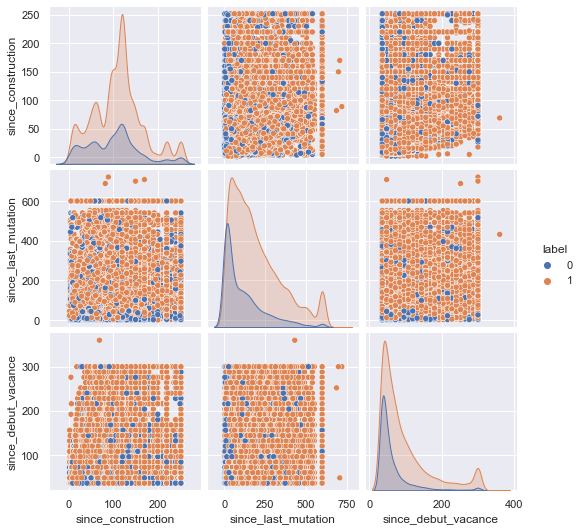

In [45]:
### Durée depuis la construction, le début vacance et la dernière mutation
sns.set(rc={'figure.figsize':(16,10)})
sns.pairplot(X[['since_construction', 'since_last_mutation', 'since_debut_vacance', 'label']], diag_kind = 'kde', hue = 'label')

### Commentaire
On observe
- qu'une grande partie des logements vacants ont entre 80 et 130 ans
- Le ratio de sortie de vacance est plus élevé parmi les logements les moins anciens
- Comme les box_plots précédents nous l'indiquaient déjà, la récence du début de vacance et de la dernière mutation de propriétaire influencent tend à augmenter les chances de sortie de vacance.'


<AxesSubplot:title={'center':'Histogramme des valeurs locatives'}, xlabel='vl_2020', ylabel='Count'>

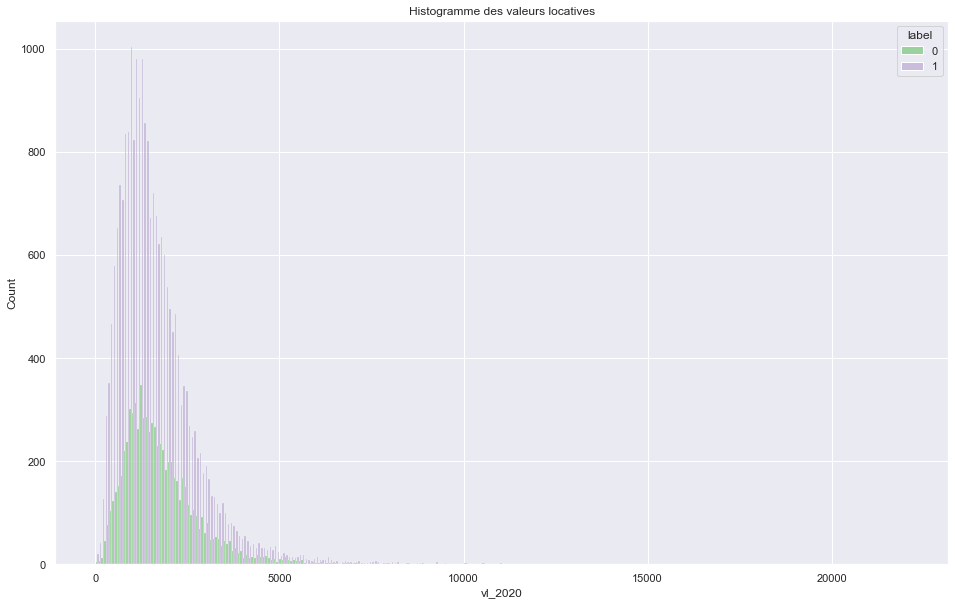

In [46]:
## Valeur locative et valeur locative au m2 habitable- après traitement des outliers
plt.figure()
plt.title("Histogramme des valeurs locatives" )
sns.histplot(data = X, x = 'vl_2020', palette = "Accent", hue = 'label', multiple='dodge')

<AxesSubplot:title={'center':'Histogramme des valeurs locatives au m^2 habitable'}, xlabel='vl_au_m2_habitable', ylabel='Density'>

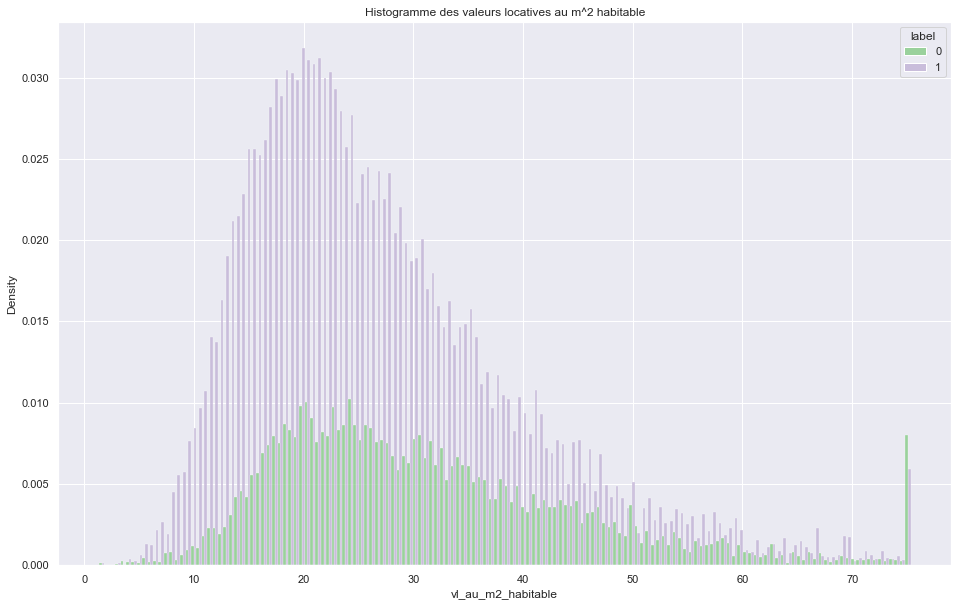

In [47]:
plt.figure()
plt.title("Histogramme des valeurs locatives au m^2 habitable")
sns.histplot(data = X, x = 'vl_au_m2_habitable', palette = "Accent", hue = 'label', multiple='dodge', bins = 150, stat = 'density')

Aucune tendance remarquable ne permet de distinguer les logements sortis et ceux restés vacants, 
- Cependant, il est assez surprenant qu'on ait une plus grande fraction de logements sortis de la vacance parmi les outliers (dernière bande de l'histogramme) ;
- On garde vl_m2_habitable, et put aside vl_2020

In [48]:
## Stratification valeur locative au m^2
def strat_vl_au_m2_habitable(x) :
    if x==0 :
        return 'zero'
    elif 0<x<=20 :
        return 'de0_a_20'
    elif 20<x<=40 : 
        return 'de_20_a_40'
    elif x > 40 :
        return 'plus_de_40'
    else :
        return 'Not_classified'
X['strat_vl_au_m2_habitable'] = X['vl_au_m2_habitable'].apply(strat_vl_au_m2_habitable)

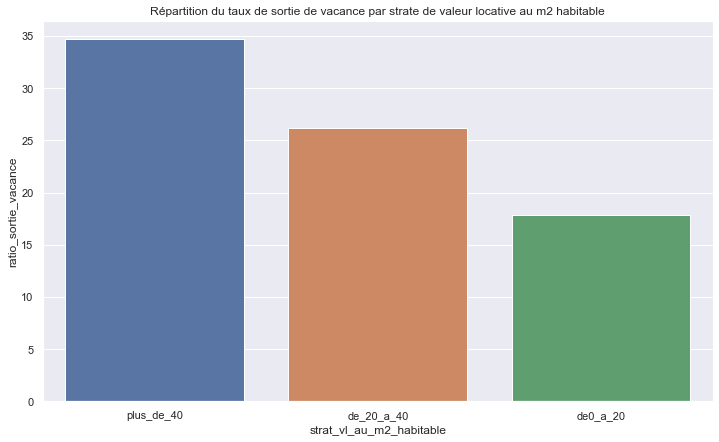

In [49]:
## Ratios de sortie par catégorie de vl_au_m2_habitable
ratio_vl_au_m2_habitable = 100-((100*X[["strat_vl_au_m2_habitable",'label']].groupby("strat_vl_au_m2_habitable").sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
X[["strat_vl_au_m2_habitable",'label']].groupby("strat_vl_au_m2_habitable").count().rename(columns={'label' : 'ratio_sortie_vacance'})).round(2)).sort_values(by=['ratio_sortie_vacance'])

plt.figure(figsize=(12,7))
plt.title("Répartition du taux de sortie de vacance par strate de valeur locative au m2 habitable")
ax = sns.barplot(data = ratio_vl_au_m2_habitable, x = ratio_vl_au_m2_habitable.index, y ='ratio_sortie_vacance' )
plt.show()

### Commentaire
* Sûrement ça reflète le niveau de confort
* Les différences sont quand même significatives faut avouer

<AxesSubplot:xlabel='zone_tendue', ylabel='Count'>

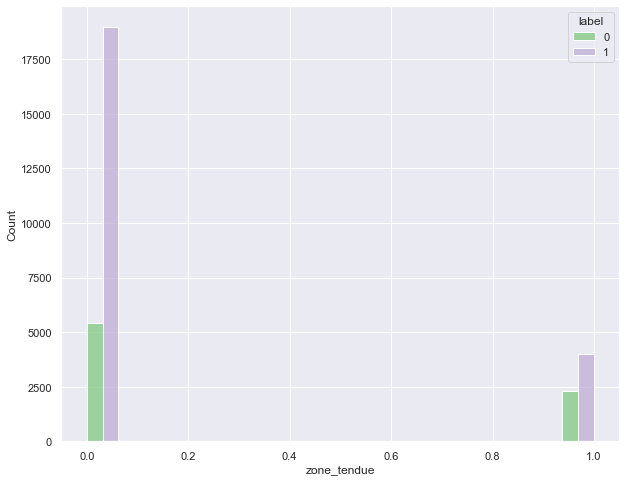

In [50]:
### Tension de marché et sortie de vacance
plt.figure(figsize = (10,8))
sns.histplot(data = X, x = 'zone_tendue', hue = 'label', palette = 'Accent', multiple = 'dodge')

Naturellement, comme on pouvait s'y attendre, on a un plus fort taux de sortie de vacance dans les logements situés dans des zones tendues. 
- Environ les 2/5 des logements sont sortis de la vacance dans les zones tendues,
- Contre seulement 1/4 dans les zones non tendues.


In [51]:
### Tension de marché et sortie de vacance : zonage ABC
X.columns


Index(['intercommunalite', 'card_epci', 'ff_idsec', 'ff_idbat', 'nature',
       'ff_dcapec2', 'ff_stoth', 'ff_slocal', 'ratio_habitable',
       'ff_npiece_p2', 'ff_dnbbai', 'ff_dnbdou', 'ff_dnbwc', 'etage',
       'ff_ndroit', 'ff_ctpdl', 'since_construction', 'since_debut_vacance',
       'since_last_mutation', 'vl_2020', 'vl_au_m2_habitable', 'zone_tendue',
       'Zone ABC', 'potentiel_thlv_tlv', 'age_proprio', 'prop_genre',
       'nb_logements_meme_proprio', 'groupe', 'ff_catpro2txt', 'ff_catpro3',
       'ff_locprop', 'gest_pas_prop', 'nb_LV_parcelle', 'nb_log_parcelle',
       'nb_LV_section', 'nb_log_section', 'label', 'Strates_ff_dcapec2',
       'Strates_ff_stoth', 'surface_dep', 'Strates_surface_dep',
       'Strates_ff_npiece_p2', 'nb_douch_bain', 'strat_nb_douch_bain',
       'strat_nb_wc', 'type_propriete', 'annee_construction',
       'periode_construction', 'periode_mutation', 'strat_vl_au_m2_habitable'],
      dtype='object')

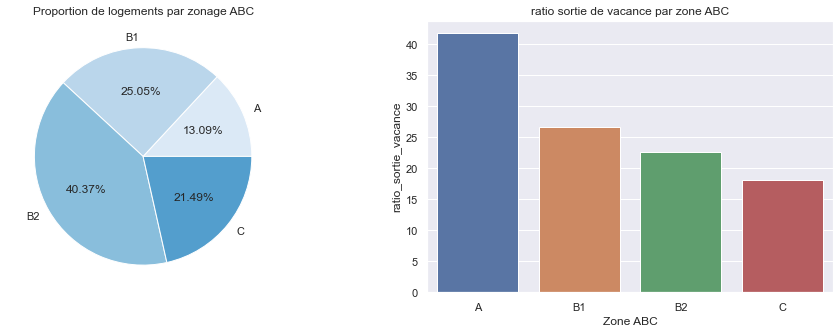

In [53]:
tab_zonage_abc = 100 - 100*((X[['Zone ABC','label']].groupby('Zone ABC').sum().rename(columns={'label' : 'ratio_sortie_vacance'})) /df20[['Zone ABC','label']].groupby('Zone ABC').count().rename(columns={'label' : 'ratio_sortie_vacance'}).sort_values(by=['ratio_sortie_vacance'])).round(4)
tab_zonage_abc['effectif'] = df20[['Zone ABC','label']].groupby('Zone ABC').count().rename(columns={'label' : 'effectif'})['effectif']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.title.set_text("Proportion de logements par zonage ABC")
ax1.pie(x = tab_zonage_abc['effectif'], labels = tab_zonage_abc.index, colors = sns.color_palette('Blues')[0:4], autopct='%.2f%%')
ax2.title.set_text("ratio sortie de vacance par zone ABC")
ax2 = sns.barplot(data = tab_zonage_abc , x = tab_zonage_abc.index , y ='ratio_sortie_vacance' )
plt.show()





In [54]:
tab_zonage_abc

,ratio_sortie_vacance,effectif
Zone ABC,,
A,41.71,4016
B1,26.68,7685
B2,22.59,12388
C,18.03,6594


<AxesSubplot:xlabel='potentiel_thlv_tlv', ylabel='Count'>

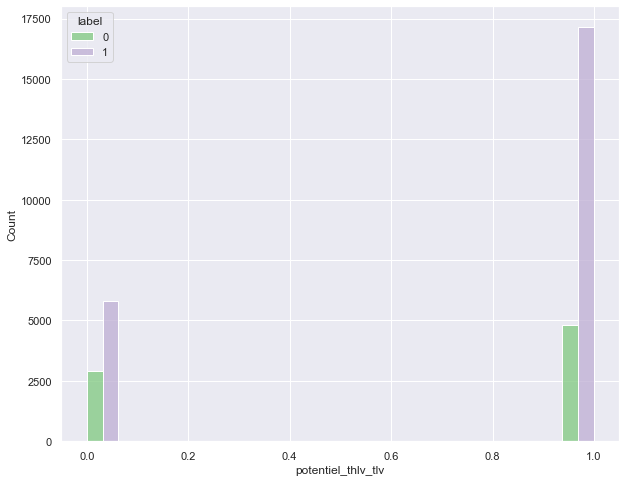

In [55]:
### Tension de marché et sortie de vacance : potentiel thlv tlv
plt.figure(figsize = (10,8))
sns.histplot(data = X, x = 'potentiel_thlv_tlv', hue = 'label', palette = 'Accent', multiple = 'dodge')

Variable très peu documentée, représente les logements soumis à la taxe (en 1) vs. ceux qui ne le sont pas ? Si oui, assez contre intuitif d'avoir un plus fort taux de sortie de vacance chez les logements moins taxés. 

<AxesSubplot:xlabel='age_proprio', ylabel='Count'>

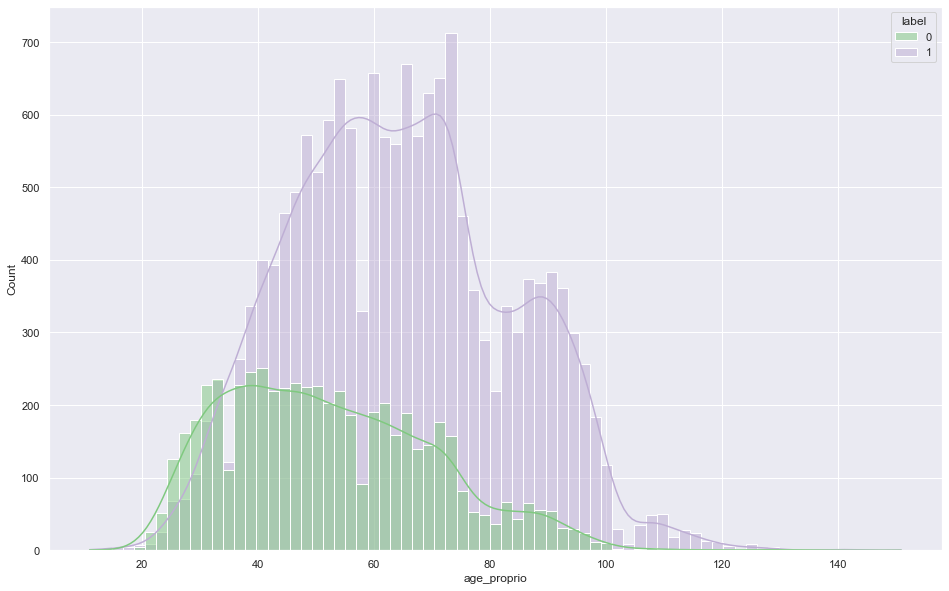

In [56]:
sns.histplot(data = X[X['age_proprio'] > 0], x = 'age_proprio' , hue = 'label', palette = 'Accent', kde=True)

On observe que le ratio de sortie de vacance chez les propriétaires jeunes (- de 36ans) est > 1/2. 
Les proprio d'un âge avancé quant à eux s'investissent certainement moins à la maintenance des logements qu'ils possèdent.

*Une action du gouvernement qui priviligie les propriétaires âgés* bien que biaisée ne serait clairement pas inadéquate au vue de ces distributions.

In [57]:
### Catégories d'âges des propriétaires
## La distribution ci-dessus nous suggère le découpage suivant : 
def strat_age_proprio (x) : 
    if 0 < x <= 37 : 
        return 'moins_de_37ans'
    elif 37< x <=60 : 
        return 'entre_37_et_60'
    elif 60<x<=75 : 
        return 'entre_60_et_75'
    elif 75<x<=105 :
        return 'entre_75_et_105'
    elif x > 105 :
        return 'plus_de_105'
    else:
        return 'Not_personne_physique'
    
X['strat_age_proprio'] = X['age_proprio'].apply(strat_age_proprio)



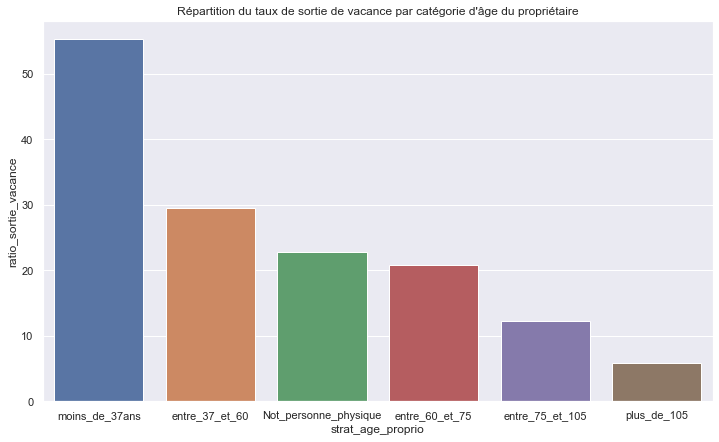

In [58]:
## Ratios de sortie par catégorie d'âge du propirétaire
ratio_cat_age_proprio = 100-((100*X[["strat_age_proprio",'label']].groupby("strat_age_proprio").sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
X[["strat_age_proprio",'label']].groupby("strat_age_proprio").count().rename(columns={'label' : 'ratio_sortie_vacance'})).round(2)).sort_values(by=['ratio_sortie_vacance'])

plt.figure(figsize=(12,7))
plt.title("Répartition du taux de sortie de vacance par catégorie d'âge du propriétaire")
ax = sns.barplot(data = ratio_cat_age_proprio, x = ratio_cat_age_proprio.index, y ='ratio_sortie_vacance' )
plt.show()

### Commentaire
* Le taux de sortie de vacance est phénoménal pour les logements dont le proprio a moins de 37 ans, comme le préconisait déjà l'histogramme précédent.
* Les plus de 105 ans doivent représenter des logements sans maître, n'ayant personne pour s'en occuper

<AxesSubplot:xlabel='nature', ylabel='nb_logements_meme_proprio'>

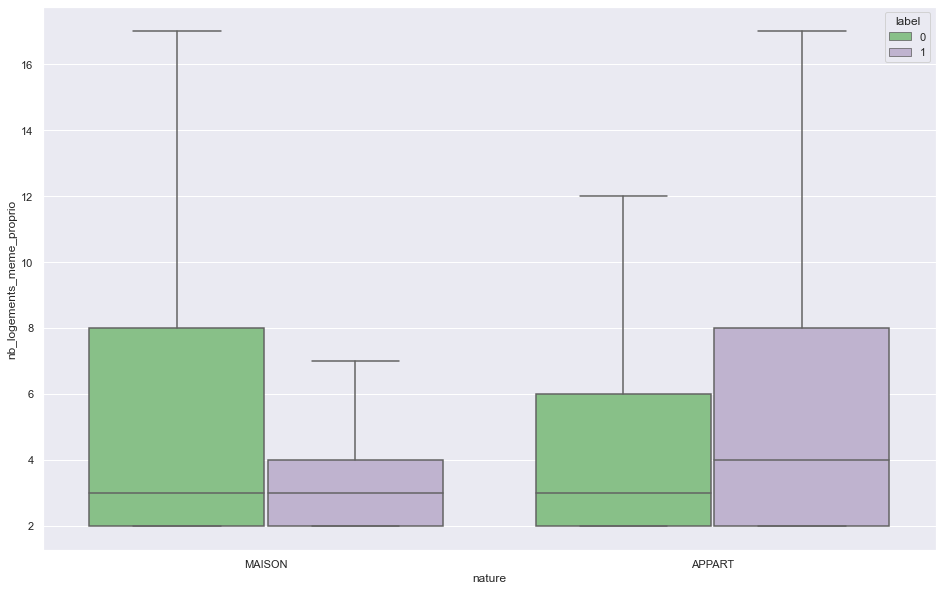

In [59]:
## nb_logements_meme_proprio : multipropriétaires

sns.boxplot(data = X[X['nb_logements_meme_proprio'] >1], x = 'nature',  y = 'nb_logements_meme_proprio', hue = 'label', palette='Accent', showfliers = False)

In [60]:
#On va créer des strates pour nombre de logement_proprio
def strat_nb_lgmt (x) :
    if x == 1 :
        return 'mono_prop'
    elif 1<x<=10 :
        return '2_to_10'
    elif 10<x<=30 : 
        return '11_to_30'
    elif x > 30 :
        return 'more_than_30'
    else :
        return 'Not_classified'

#Creating column categorizing the owner's total number of housings

X['strates_nb_logements'] = (X['nb_logements_meme_proprio']).apply(strat_nb_lgmt)

<AxesSubplot:xlabel='strates_nb_logements', ylabel='ratio_sortie_vacance'>

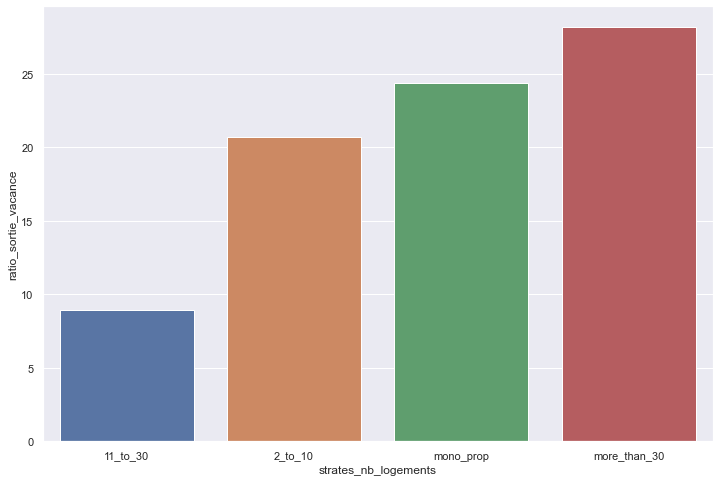

In [206]:
ratio_nb_lgmt_proprio = 100-100*(X[['strates_nb_logements', 'label']].groupby('strates_nb_logements')).sum().rename(columns={'label' : 'ratio_sortie_vacance'})/(X[['strates_nb_logements', 'label']].groupby('strates_nb_logements')).count().rename(columns={'label' : 'ratio_sortie_vacance'})

sns.barplot(data = ratio_nb_lgmt_proprio.sort_values('ratio_sortie_vacance') , x = ratio_nb_lgmt_proprio.index , y = 'ratio_sortie_vacance')

### Commentaires
Ce diagramme en bandes nous donne de très précieux insights ! 

1- Les logements appartenant à des propriétaires possédants un grand nombre de logements (>30 dans notre stratification) ont les plus grandes chances (~28%) de sortie de vacance. Ceci était assez prévisible puisque lorsque le nombre de logements à la charge d'un propriétaire qu'il soit physique ou morale devient trop important, la charge fiscale qui s'accompagne devient trop importante donc ils ont nettement intérêt à rehabiliter ces logements. De plus, les grands sites de logements/immeubles locatifs passent difficilement inapperçus des demandeurs de logement.

2- Ensuite viennent les logements de mono propriétaires (~24,5%) : Un seul local dont on a la charge, plus facile de s'en occuper.

3- Après, la catégorie 2 à 10, avec un taux de sortie (~20,5%), qui contient les propriétaires à 2-3 logements, nombre qui reste suffisamment petit pour les assimiler aux mono-propriétaires.

4 Enfin, le plus faible taux de sortie de vacance (moins de 10%), chez les propriétaires possédant de multiples logements assez pour requérir un besoin de maintenance au dessus de leurs efforts, mais pas suffisamment nombreux pour craindre les pertes inhérentes à leur vacance.

**Note :** On pourrait reprendre cette partie sans réaliser une stratification, mais en groupant toujours les logements en foncion de nb_logement_meme_proprio, et réaliser un histogramme pour avoir une vision plus détaillée de l'influence de cette variable.

<AxesSubplot:xlabel='prop_genre', ylabel='ratio_sortie_vacance'>

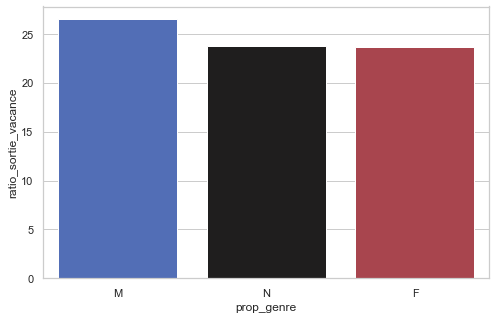

In [62]:
#Ratios de sortie de vacance en fonction du genre des proprios
tmp = 100-((100*df20[['prop_genre','label']].groupby('prop_genre').sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
df20[['prop_genre','label']].groupby('prop_genre').count().rename(columns={'label' : 'ratio_sortie_vacance'})).sort_values(by=['ratio_sortie_vacance'])).round(2)
plt.figure(figsize = (8,5))
sns.set_theme(style="whitegrid")
sns.barplot(data = tmp, x =tmp.index , y = 'ratio_sortie_vacance', palette = 'icefire')

Y'aurait-il plus de chances de sortie de la vacance quand le propriétaire est Masculin ? 

<AxesSubplot:xlabel='ff_locprop', ylabel='Count'>

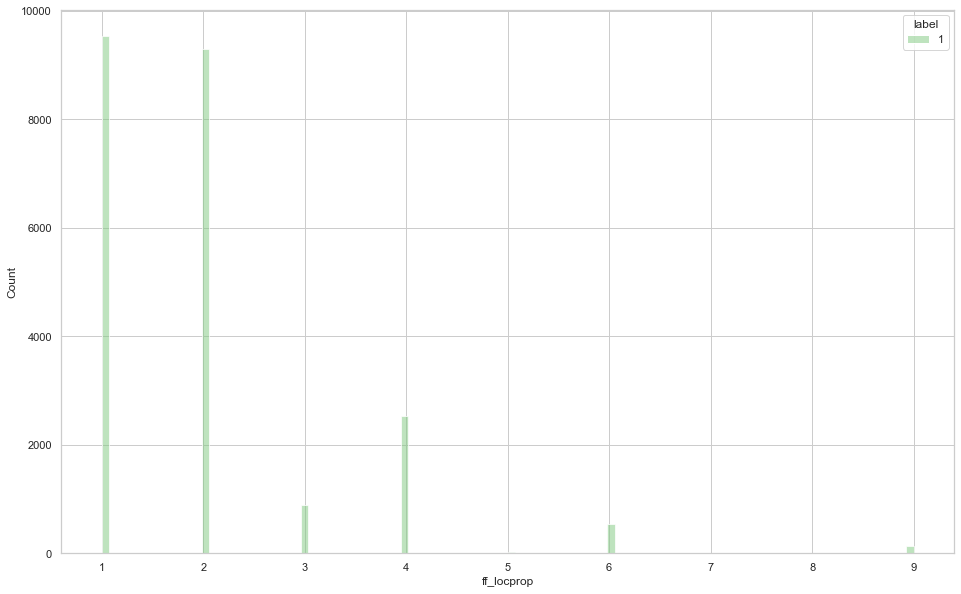

In [63]:
#Proximité du propriétaire
sns.histplot(data = X[X['ff_locprop'] != -1], x = 'ff_locprop', hue = 'label', palette = 'Accent')

### Commentaire
- Cette variable n'était présente que dans le fichier Lovac2021, c'est pourquoi tous les labels sont à 1. 
- Bien que très pertinente, elle ne sera pas prise en compte pour l'analyse car pour jauger son effet, il faut avoir les données sur les logements qui sont sortis de vacances, qu'on n'a pas.
- Néanmoins on peut déjà se faire un apperçu du parc vacant (2020 et 2021), Et voir qu'une grande fraction des logements vacants ont leur propriétaire à proximité.

In [64]:
## Gestionnaire pas propriétaire ? 
tmp = 100-((100*df20[['gest_pas_prop','label']].groupby('gest_pas_prop').sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
df20[['gest_pas_prop','label']].groupby('gest_pas_prop').count().rename(columns={'label' : 'ratio_sortie_vacance'})).sort_values(by=['ratio_sortie_vacance'])).round(2)
tmp['effectif'] = df20[['gest_pas_prop','label']].groupby('gest_pas_prop').count().rename(columns={'label' : 'effectif'})['effectif']

tmp

,ratio_sortie_vacance,effectif
gest_pas_prop,,
0,25.20,30446
1,16.46,237


La table ci-dessus nous indique que les logements dont le gestionnaire n'est pas le propriétaire ont un plus faible taux de sortie de vacance. Une explication métier pourrait être que le niveau d'implication dans l'entretien du logement est à priori moindre lorsque le responsable du logement n'est pas son propriétaire. 

Cependant, cette différence est peu significative puisque c'est les logements qui possèdent un gestionnaire différent du propriétaire ne représentent même pas un centième du parc vacant. 

<AxesSubplot:xlabel='groupe', ylabel='ratio_sortie_vacance'>

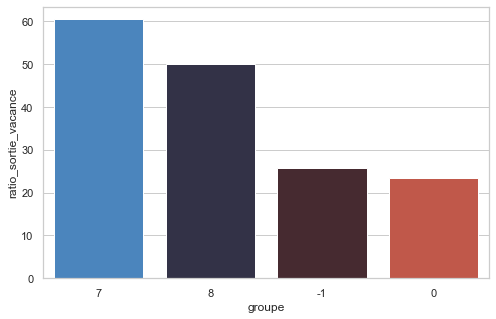

In [65]:
### Groupe de propriétaire 
tmp = 100-((100*df20[['groupe','label']].groupby('groupe').sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
df20[['groupe','label']].groupby('groupe').count().rename(columns={'label' : 'ratio_sortie_vacance'})).sort_values(by=['ratio_sortie_vacance'])).round(2)
plt.figure(figsize = (8,5))
sns.set_theme(style="whitegrid")
sns.barplot(data = tmp, x =tmp.index , y = 'ratio_sortie_vacance', palette = 'icefire')

- On observe un taux de sortie de vacance de 60% parmi les logements de catégorie 7, et 50% ceux de categories 8. 
Cependant, ces écarts ne sont que très peu significatifs car comme le montre la table juste après, les logements dont le propriétaire est de catégorie 7 et 8 ne constituent que les 3% du parc !

- Cependant, on peut remarquer un taux de sortie de vacance plus élevé (~26%) pour le groupe (-1) - personnes physiques, contre (~22%) pour le groupe 0 - autres personnes morales.

In [66]:
df20[['groupe','label']].groupby('groupe').count().rename(columns={'label' : 'nb_logements'})

,nb_logements
groupe,
-1,21966
0,8612
7,101
8,4


In [67]:
### Categorie_proprietaire
#print(np.sort(X['ff_catpro2txt'].unique()))

#X['ff_catpro3'].unique().size
## 118 catégories distinctes, on va créer des catégories plus englobantes en groupant les modalités moins représentées

## Mapping 

def strat_ff_catpro2txt (x) : 
    if x in {'PERSONNE PHYSIQUE', 'SOCIETE CIVILE A VOCATION IMMOBILIERE', 'INVESTISSEUR PROFESSIONNEL', 'ORGANISME DE LOGEMENT SOCIAL' } :
        return x
    else :
        return 'AUTRE PERSONNE MORALE'
    
X['strat_ff_catpro2txt'] = X['ff_catpro2txt'].apply(strat_ff_catpro2txt)

In [68]:
print(np.sort(X['strat_ff_catpro2txt'].unique()))

['AUTRE PERSONNE MORALE' 'INVESTISSEUR PROFESSIONNEL'
 'ORGANISME DE LOGEMENT SOCIAL' 'PERSONNE PHYSIQUE'
 'SOCIETE CIVILE A VOCATION IMMOBILIERE']


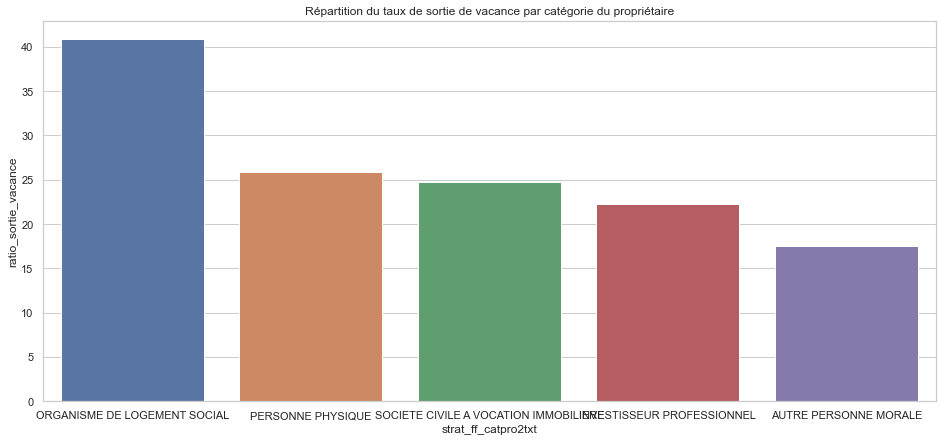

In [69]:
## Ratios de sortie par catégorie propirétaire
ratio_strat_ff_catpro = 100-((100*X[["strat_ff_catpro2txt",'label']].groupby("strat_ff_catpro2txt").sum().rename(columns={'label' : 'ratio_sortie_vacance'})/
X[["strat_ff_catpro2txt",'label']].groupby("strat_ff_catpro2txt").count().rename(columns={'label' : 'ratio_sortie_vacance'})).round(2)).sort_values(by=['ratio_sortie_vacance'])

plt.figure(figsize=(16,7))
plt.title("Répartition du taux de sortie de vacance par catégorie du propriétaire")
ax = sns.barplot(data = ratio_strat_ff_catpro, x = ratio_strat_ff_catpro.index, y ='ratio_sortie_vacance' )
plt.show()

### Analyse d'échelle
1- Par Section

In [71]:


X['prop_vac_parcelle'] = (100*(X['nb_LV_parcelle']/X['nb_log_parcelle'])).round(2)
X['prop_vac_section'] = (100*(X['nb_LV_section']/X['nb_log_section'])).round(2)

In [72]:
tab_vac_section = 100 - 100*((X[['ff_idsec', 'prop_vac_section', 'nb_log_section', 'label']].groupby(['ff_idsec','prop_vac_section', 'nb_log_section']).sum('label'))/(X[['ff_idsec', 'prop_vac_section', 'nb_log_section', 'label']].groupby(['ff_idsec','prop_vac_section', 'nb_log_section']).count())).round(4)
tab_vac_section = tab_vac_section.rename(columns={'label':'ratio_sortie_vacance'})
tab_vac_section = tab_vac_section.reset_index()

In [73]:
tab_vac_section.sort_values('prop_vac_section')

,ff_idsec,prop_vac_section,nb_log_section,ratio_sortie_vacance
2083,59368000BO,0.12,819,100.0
2672,59508000AA,0.13,764,0.0
2138,59378000BO,0.17,1179,100.0
3553,59646000AV,0.18,1086,50.0
1743,59339000AH,0.18,566,100.0
...,...,...,...,...
1612,593060000B,100.00,1,0.0
125,59015000ZE,100.00,1,0.0
1320,59256000ZB,100.00,1,0.0
2317,59416000YB,100.00,1,0.0


In [74]:
X[X['ff_idsec']=='593503550C']

,intercommunalite,card_epci,ff_idsec,ff_idbat,nature,ff_dcapec2,ff_stoth,ff_slocal,ratio_habitable,ff_npiece_p2,ff_dnbbai,ff_dnbdou,ff_dnbwc,etage,ff_ndroit,ff_ctpdl,since_construction,since_debut_vacance,since_last_mutation,vl_2020,vl_au_m2_habitable,zone_tendue,Zone ABC,potentiel_thlv_tlv,age_proprio,prop_genre,nb_logements_meme_proprio,groupe,ff_catpro2txt,ff_catpro3,ff_locprop,gest_pas_prop,nb_LV_parcelle,nb_log_parcelle,nb_LV_section,nb_log_section,label,Strates_ff_dcapec2,Strates_ff_stoth,surface_dep,Strates_surface_dep,Strates_ff_npiece_p2,nb_douch_bain,strat_nb_douch_bain,strat_nb_wc,type_propriete,annee_construction,periode_construction,periode_mutation,strat_vl_au_m2_habitable,strat_age_proprio,strates_nb_logements,strat_ff_catpro2txt,prop_vac_parcelle,prop_vac_section
14735,U018,8850,593503550C,593503550C0600A,MAISON,5,142,151,94.04,8,1,0,1,0.0,1,Aucune,87,60,51.0,3009,21.19,1,A,1,-1,N,5,0,ORGANISME DE LOGEMENT SOCIAL,F1a,2,0,1.0,0.0,96,5224,1,moyen_confort_5_a_6,de_100_a_200,9,de_0_a_15,plus_de_5,1,une_seule,un_wc,Monopropriete,1933,1919_a_1946,moins_de_5_ans,de_20_a_40,Not_personne_physique,2_to_10,ORGANISME DE LOGEMENT SOCIAL,inf,1.84
14827,U018,8850,593503550C,593503550C6426D,MAISON,6,71,154,46.10,5,0,1,1,0.0,1,Aucune,117,48,28.0,1815,25.56,1,A,1,-1,N,1,0,PROMOTEUR,F6c,2,0,1.0,0.0,96,5224,1,moyen_confort_5_a_6,de_60_a_100,83,plus_de_50,de_3_a_5,1,une_seule,un_wc,Monopropriete,1903,avant_1919,moins_de_5_ans,de_20_a_40,Not_personne_physique,mono_prop,AUTRE PERSONNE MORALE,inf,1.84
14990,U018,8850,593503550C,593503550C3454A,APPART,6,49,49,100.00,2,0,1,1,1.0,1,Aucune,110,36,9.0,1362,27.80,1,A,0,-1,N,3,0,INVESTISSEUR PROFESSIONNEL,F7b,2,0,3.0,0.0,96,5224,1,moyen_confort_5_a_6,de_40_a_60,0,aucune,une_ou_2,1,une_seule,un_wc,Monopropriete,1910,avant_1919,moins_de_5_ans,de_20_a_40,Not_personne_physique,2_to_10,INVESTISSEUR PROFESSIONNEL,inf,1.84
14991,U018,8850,593503550C,593503550C3454A,APPART,6,52,52,100.00,3,0,1,1,1.0,1,Aucune,110,36,9.0,1427,27.44,1,A,0,-1,N,3,0,INVESTISSEUR PROFESSIONNEL,F7b,2,0,3.0,0.0,96,5224,1,moyen_confort_5_a_6,de_40_a_60,0,aucune,de_3_a_5,1,une_seule,un_wc,Monopropriete,1910,avant_1919,moins_de_5_ans,de_20_a_40,Not_personne_physique,2_to_10,INVESTISSEUR PROFESSIONNEL,inf,1.84
14992,U018,8850,593503550C,593503550C3454A,APPART,6,40,40,100.00,1,0,0,0,2.0,1,Aucune,110,36,9.0,815,20.38,1,A,0,-1,N,3,0,INVESTISSEUR PROFESSIONNEL,F7b,-1,0,3.0,0.0,96,5224,0,moyen_confort_5_a_6,de_40_a_60,0,aucune,une_ou_2,0,pas_de_douche_ni_baignoire,pas_de_wc,Monopropriete,1910,avant_1919,moins_de_5_ans,de_20_a_40,Not_personne_physique,2_to_10,INVESTISSEUR PROFESSIONNEL,inf,1.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17943,U018,8850,593503550C,593503550C6690B,APPART,5,54,62,87.10,2,1,0,1,1.0,1,CL,13,72,169.0,2100,38.89,1,A,1,74,F,2,-1,PERSONNE PHYSIQUE,X1a,3,0,1.0,0.0,96,5224,1,moyen_confort_5_a_6,de_40_a_60,8,de_0_a_15,une_ou_2,1,une_seule,un_wc,Propriete_en_lot,2007,plus_de_1991,plus_de_12_ans,de_20_a_40,entre_60_et_75,2_to_10,PERSONNE PHYSIQUE,inf,1.84
17944,U018,8850,593503550C,593503550C6700A,MAISON,6,95,133,71.43,4,1,0,1,1.0,1,CV,94,72,103.0,2919,30.73,1,A,1,60,M,1,-1,PERSONNE PHYSIQUE,X1a,-1,0,1.0,0.0,96,5224,0,moyen_confort_5_a_6,de_60_a_100,38,de_15_a_50,de_3_a_5,1,une_seule,un_wc,Autre,1926,1919_a_1946,entre_5_et_12_ans,de_20_a_40,entre_37_et_60,mono_prop,PERSONNE PHYSIQUE,inf,1.84
17945,U018,8850,593503550C,593503550C6701B,MAISON,6,134,149,89.93,4,1,1,2,0.0,1,Aucune,7,60,103.0,2702,20.16,1,A,1,57,M,1,-1,PERSONNE PHYSIQUE,X1a,2,0,1.0,1.0,96,5224,1,moyen_confort_5_a_6,de_100_a_200,15,de_0_a_15,de_3_a_5,2,deux,deux_wc,Monopropriete,2013,plus_de_1991,entre_5_et_12_ans,de_20_a_40,entre_37_et_60,mono_prop,PERSONNE PHYSIQUE,100.0,1.84
17946,U018,8850,593503550C,593503550C6828A,APPART,5,63,81,77.78,3,1,0,1,0.0,2,CL,5,48,64.0,2408,38.

In [75]:
tab_vac_section['nb_log_section'].describe()

count    3695.000000
mean      245.415156
std       282.102023
min         1.000000
25%        61.000000
50%       170.000000
75%       334.000000
max      5224.000000
Name: nb_log_section, dtype: float64

<AxesSubplot:>

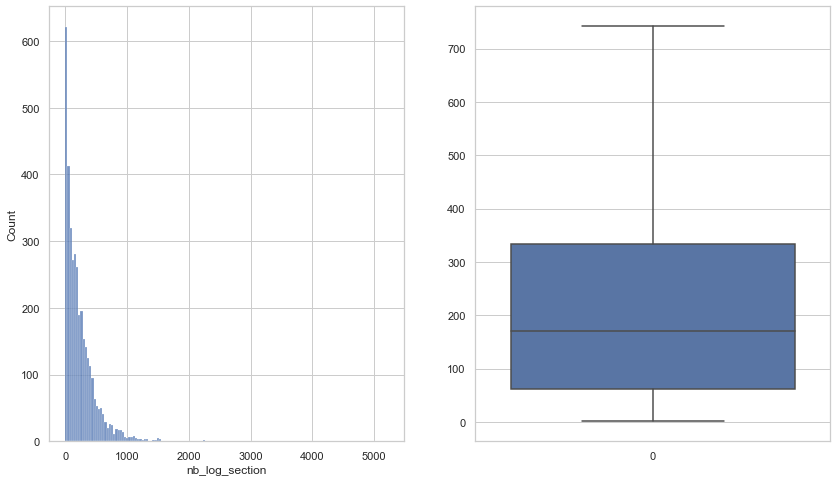

In [76]:
fig, axs = plt.subplots(ncols=2, figsize=(14,8)) 

sns.histplot(data = tab_vac_section, x='nb_log_section', palette = 'icefire', ax=axs[0])

sns.boxplot(data = tab_vac_section['nb_log_section'], showfliers = False, ax=axs[1])

In [77]:
## Ces plots nous suggère le découpage suivant 
def strate_taille_section(x):
    if 1 <= x < 60 :
        return "de_1_a_60"
    elif 60 <= x < 200 :
        return "de_60_a_200"
    elif 200 <= x < 350 :
        return "de 200_a_350"
    elif 350 <= x < 900 :
        return "de_350_a_900"
    elif x >= 900 :
        return 'plus_de_900'
    else :
        return "Not_classified"
    

In [78]:
tab_vac_section['strat_taille_sec'] = tab_vac_section['nb_log_section'].apply(strate_taille_section)


<AxesSubplot:xlabel='strat_taille_sec', ylabel='ratio_sortie_vacance'>

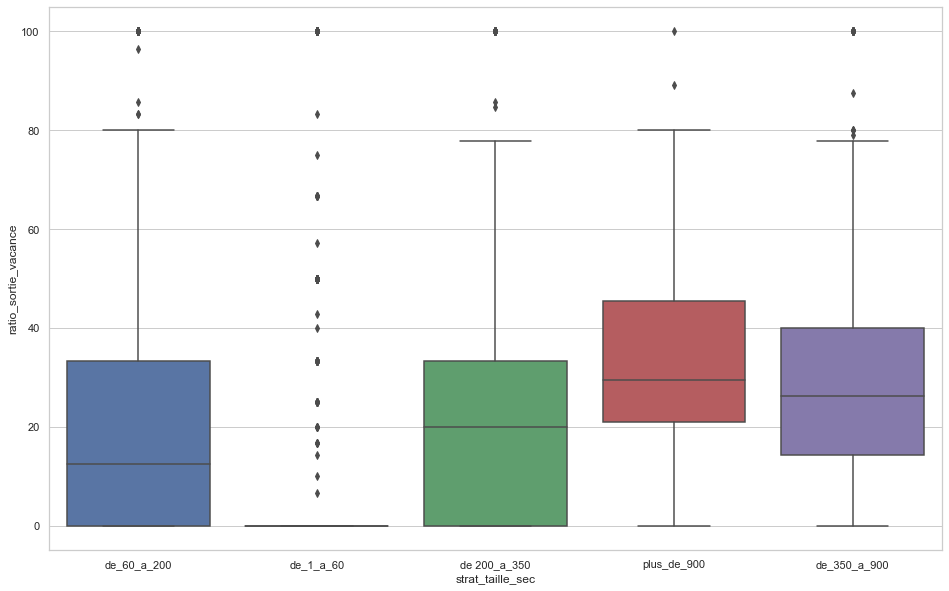

In [79]:
sns.boxplot(data = tab_vac_section, x ='strat_taille_sec',  y='ratio_sortie_vacance', showfliers = True)

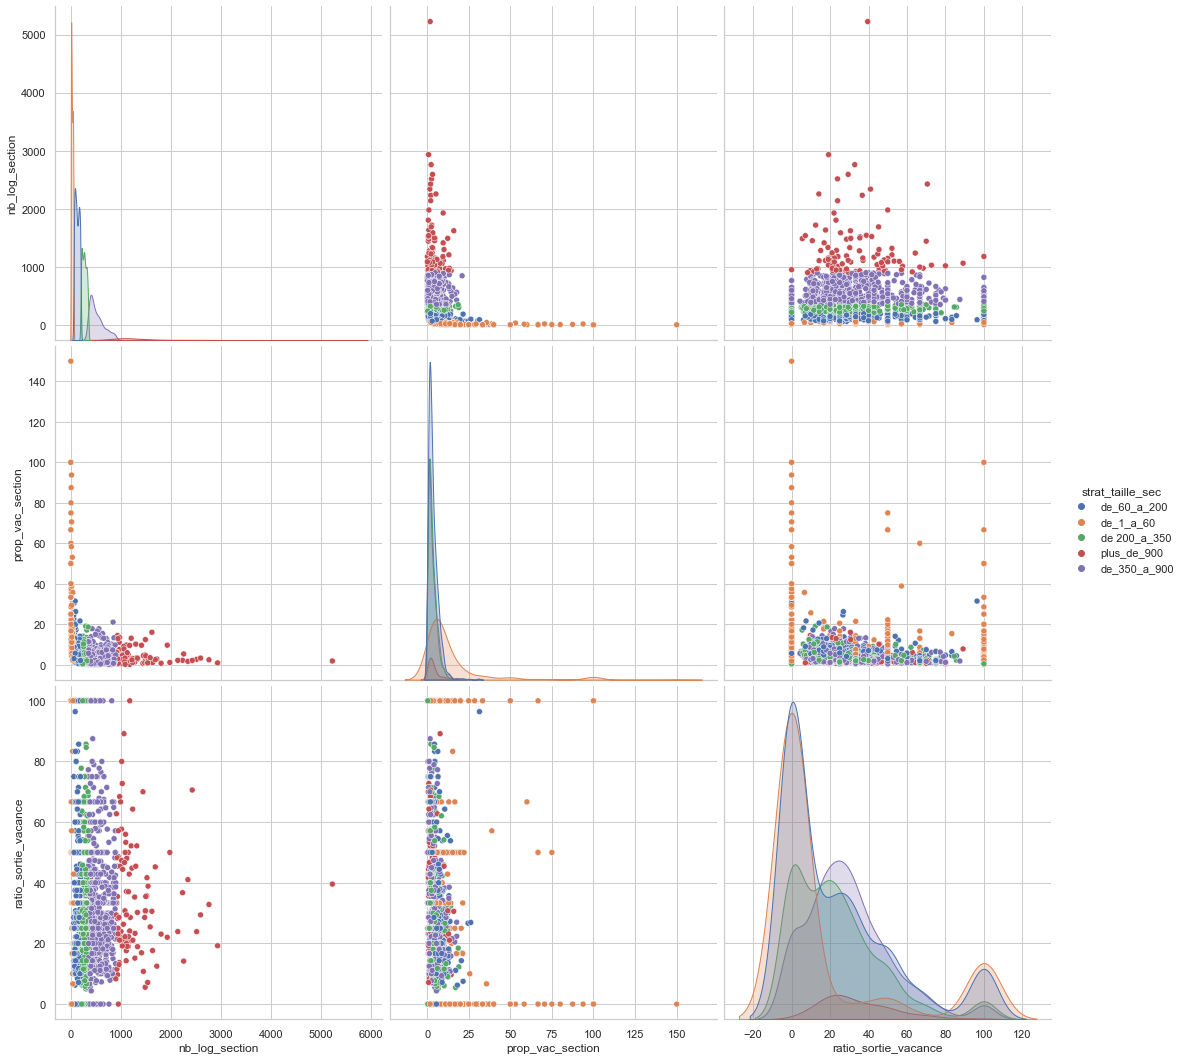

In [80]:

sns.pairplot(tab_vac_section[['nb_log_section','prop_vac_section','ratio_sortie_vacance','strat_taille_sec']], hue = 'strat_taille_sec', height=5)

In [96]:
tab_vac_sec_brief = tab_vac_section.drop(columns=['nb_log_section', 'prop_vac_section'], axis = 1)
X_final = X.set_index('ff_idsec').join(tab_vac_sec_brief.set_index('ff_idsec'), how = 'left')
X_final = X_final.reset_index()


In [97]:
X_final = X_final.rename(columns = {'ratio_sortie_vacance' : 'ratio_sortie_vacance_section'})


In [98]:
X_final.head(10)

,ff_idsec,intercommunalite,card_epci,ff_idbat,nature,ff_dcapec2,ff_stoth,ff_slocal,ratio_habitable,ff_npiece_p2,ff_dnbbai,ff_dnbdou,ff_dnbwc,etage,ff_ndroit,ff_ctpdl,since_construction,since_debut_vacance,since_last_mutation,vl_2020,vl_au_m2_habitable,zone_tendue,Zone ABC,potentiel_thlv_tlv,age_proprio,prop_genre,nb_logements_meme_proprio,groupe,ff_catpro2txt,ff_catpro3,ff_locprop,gest_pas_prop,nb_LV_parcelle,nb_log_parcelle,nb_LV_section,nb_log_section,label,Strates_ff_dcapec2,Strates_ff_stoth,surface_dep,Strates_surface_dep,Strates_ff_npiece_p2,nb_douch_bain,strat_nb_douch_bain,strat_nb_wc,type_propriete,annee_construction,periode_construction,periode_mutation,strat_vl_au_m2_habitable,strat_age_proprio,strates_nb_logements,strat_ff_catpro2txt,prop_vac_parcelle,prop_vac_section,strat_debut_vacance,ratio_sortie_vacance_section,strat_taille_sec
0,590010000U,L017,1715,590010000U1339A,MAISON,6,159,197,87.82,5,1,0,2,0.0,1,Aucune,95,36,205.0,2023,11.69,0,C,1,-1,N,1,0,SOCIETE CIVILE A VOCATION IMMOBILIERE,G1a,1,0,1.0,12.0,8,116,1,moyen_confort_5_a_6,de_100_a_200,38,de_15_a_50,de_3_a_5,1,une_seule,deux_wc,Monopropriete,1925,1919_a_1946,plus_de_12_ans,de0_a_20,Not_personne_physique,mono_prop,SOCIETE CIVILE A VOCATION IMMOBILIERE,8.33,6.90,moins_de_5_ans,0.0,de_60_a_200
1,590010000U,L017,1715,590010000U1578A,APPART,6,110,190,57.89,5,1,0,0,0.0,1,Aucune,150,36,33.0,1427,12.97,0,C,1,-1,N,1,0,SOCIETE CIVILE A VOCATION IMMOBILIERE,G1a,1,0,1.0,12.0,8,116,1,moyen_confort_5_a_6,de_100_a_200,80,plus_de_50,de_3_a_5,1,une_seule,pas_de_wc,Monopropriete,1870,avant_1919,moins_de_5_ans,de0_a_20,Not_personne_physique,mono_prop,SOCIETE CIVILE A VOCATION IMMOBILIERE,8.33,6.90,moins_de_5_ans,0.0,de_60_a_200
2,590010000U,L017,1715,590010000U1389B,MAISON,6,90,345,26.09,3,0,0,1,0.0,1,Aucune,97,72,55.0,1667,18.52,0,C,0,-1,N,1,0,SOCIETE CIVILE A VOCATION IMMOBILIERE,G1d,1,0,1.0,12.0,8,116,1,moyen_confort_5_a_6,de_60_a_100,255,plus_de_50,de_3_a_5,0,pas_de_douche_ni_baignoire,un_wc,Monopropriete,1923,1919_a_1946,moins_de_5_ans,de0_a_20,Not_personne_physique,mono_prop,SOCIETE CIVILE A VOCATION IMMOBILIERE,8.33,6.90,entre_5_et_10_ans,0.0,de_60_a_200
3,590010000U,L017,1715,590010000U1174A,MAISON,6,98,199,49.25,4,1,1,0,0.0,1,Aucune,100,60,47.0,1560,15.92,0,C,1,48,F,1,-1,PERSONNE PHYSIQUE,X1a,2,0,1.0,12.0,8,116,1,moyen_confort_5_a_6,de_60_a_100,101,plus_de_50,de_3_a_5,2,deux,pas_de_wc,Monopropriete,1920,1919_a_1946,moins_de_5_ans,de0_a_20,entre_37_et_60,mono_prop,PERSONNE PHYSIQUE,8.33,6.90,entre_5_et_10_ans,0.0,de_60_a_200
4,590010000U,L017,1715,590010000U1212A,MAISON,8,45,45,100.00,2,0,0,0,0.0,1,Aucune,98,300,349.0,256,5.69,0,C,0,61,F,1,-1,PERSONNE PHYSIQUE,X1a,1,0,1.0,12.0,8,116,1,haut_confort_7_a_8,de_40_a_60,0,aucune,une_ou_2,0,pas_de_douche_ni_baignoire,pas_de_wc,Monopropriete,1922,1919_a_1946,plus_de_12_ans,de0_a_20,entre_60_et_75,mono_prop,PERSONNE PHYSIQUE,8.33,6.90,plus_de_10_ans,0.0,de_60_a_200
5,590010000U,L017,1715,590010000U1360A,MAISON,7,80,105,76.19,3,0,0,0,0.0,2,Aucune,98,300,408.0,537,6.71,0,C,1,100,F,1,-1,PERSONNE PHYSIQUE,X1a,1,0,1.0,12.0,8,116,1,haut_confort_7_a_8,de_60_a_100,25,de_15_a_50,de_3_a_5,0,pas_de_douche_ni_baignoire,pas_de_wc,Monopropriete,1922,1919_a_1946,plus_de_12_ans,de0_a_20,entre_75_et_105,mono_prop,PERSONNE PHYSIQUE,8.33,6.90,plus_de_10_ans,0.0,de_60_a_200
6,590010000U,L017,1715,590010000U1369A,MAISON,5,159,289,55.36,5,0,0,0,0.0,1,Aucune,100,300,600.0,2657,16.61,0,C,1,90,M,1,-1,PERSONNE PHYSIQUE,X1a,1,0,1.0,12.0,8,116,1,moyen_confort_5_a_6,de_100_a_200,130,plus_de_50,de_3_a_5,0,pas_de_douche_ni_baignoire,pas_de_wc,Monopropriete,1920,1919_a_1946,plus_de_12_ans,de0_a_20,entre_75_et_105,mono_prop,PERSONNE PHYSIQUE,8.33,6.90,plus_de_10_ans,0.0,de_60_a_200
7,590010000U,L017,1715,590010000U1396A,MAISON,6,114,370,30.81,4,1,1,1,0.0,1,Aucune,120,48,40.0,1793,15.73,0,C,1,32,M,1,-1,PERSONNE PHYSIQUE,X1a,2,0,1.0,12.0,8,116,1,moyen_confort_5_a_6,de_100_a_200,256,plus_de_50,de_3_a_5,2,deux,un_wc,Monopropriete,1900,avant_1919,moins_de_5_ans,d

#### 2 - Par Parcelle

Un problème se pose, on a 158 valeurs aberrantes, dans le sens plus de logements vacants que de logements dans la parcelle. 
    Après avoir résolu ce problème (à la source, parce qu'il n'est pas question d'outliers), on pourra reprendre le même processus que pour l'analyse par parcelle.

In [ ]:
X[X['prop_vac_parcelle']>100]

In [99]:
X_final.loc[:,'etage']=X_final['etage'].fillna(X['etage'].median())

In [100]:
### Final DataSet, before OneHotEncoding
X_final.describe(include="all")


,ff_idsec,intercommunalite,card_epci,ff_idbat,nature,ff_dcapec2,ff_stoth,ff_slocal,ratio_habitable,ff_npiece_p2,ff_dnbbai,ff_dnbdou,ff_dnbwc,etage,ff_ndroit,ff_ctpdl,since_construction,since_debut_vacance,since_last_mutation,vl_2020,vl_au_m2_habitable,zone_tendue,Zone ABC,potentiel_thlv_tlv,age_proprio,prop_genre,nb_logements_meme_proprio,groupe,ff_catpro2txt,ff_catpro3,ff_locprop,gest_pas_prop,nb_LV_parcelle,nb_log_parcelle,nb_LV_section,nb_log_section,label,Strates_ff_dcapec2,Strates_ff_stoth,surface_dep,Strates_surface_dep,Strates_ff_npiece_p2,nb_douch_bain,strat_nb_douch_bain,strat_nb_wc,type_propriete,annee_construction,periode_construction,periode_mutation,strat_vl_au_m2_habitable,strat_age_proprio,strates_nb_logements,strat_ff_catpro2txt,prop_vac_parcelle,prop_vac_section,strat_debut_vacance,ratio_sortie_vacance_section,strat_taille_sec
count,30683,30683,30683.000000,30683,30683,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683,30683.000000,30683.00000,30683.000000,30683.000000,30683.000000,30683.000000,30683,30683.000000,30683.000000,30683,30683.000000,30683,30683,30683,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683,30683,30683.000000,30683,30683,30683.000000,30683,30683,30683,30683.000000,30683,30683,30683,30683,30683,30683,30683.00,30683.000000,30683,30683.000000,30683
unique,3695,18,NaN,24930,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,3,NaN,4,75,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,NaN,4,4,NaN,5,4,3,NaN,4,3,3,6,4,5,NaN,NaN,3,NaN,5
top,59606000AQ,U018,NaN,59183000XH0287A,MAISON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucune,NaN,NaN,NaN,NaN,NaN,NaN,B2,NaN,NaN,M,NaN,-1,PERSONNE PHYSIQUE,X1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moyen_confort_5_a_6,de_60_a_100,NaN,aucune,de_3_a_5,NaN,une_seule,un_wc,Monopropriete,NaN,avant_1919,plus_de_12_ans,de_20_a_40,Not_personne_physique,mono_prop,PERSONNE PHYSIQUE,NaN,NaN,moins_de_5_ans,NaN,de_350_a_900
freq,255,8850,NaN,63,17528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26521,NaN,NaN,NaN,NaN,NaN,NaN,12388,NaN,NaN,15745,NaN,21966,21862,21862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23721,10842,NaN,11859,15098,NaN,18582,23093,26521,NaN,17048,14640,16310,8981,18897,21862,NaN,NaN,13300,NaN,12786
mean,NaN,NaN,4024.981358,NaN,NaN,5.880422,65.361112,101.822899,78.292705,2.992178,0.428478,0.318515,0.842845,0.745559,1.513542,NaN,108.281687,87.05798,175.565753,1699.882932,28.234956,0.205521,NaN,0.715901,43.152430,NaN,5.291497,NaN,NaN,NaN,1.233158,0.007724,2.663103,11.769905,33.710002,550.216244,0.748656,NaN,NaN,36.461787,NaN,NaN,0.746993,NaN,NaN,NaN,1911.718313,NaN,NaN,NaN,NaN,NaN,NaN,inf,6.544546,NaN,25.134248,NaN
std,NaN,NaN,3215.386439,NaN,NaN,0.825303,36.335325,84.620042,22.280250,1.701927,0.510556,0.496193,0.506016,2.991027,0.886770,NaN,57.015897,67.41285,153.672179,1142.639655,13.106611,0.404088,NaN,0.450991,32.731329,NaN,17.525947,NaN,NaN,NaN,1.687753,0.087548,6.594004,55.052630,42.315952,528.131404,0.433793,NaN,NaN,58.979379,NaN,NaN,0.607380,NaN,NaN,NaN,57.015897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.718248,NaN,18.935686,NaN
min,NaN,NaN,137.000000,NaN,NaN,3.000000,1.000000,1.000000,0.310000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,36.00000,1.000000,10.000000,1.350000,0.000000,NaN,0.000000,-1.000000,NaN,1.000000,NaN,NaN,NaN,-1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,1768.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.120000,NaN,0.000000,NaN
25%,NaN,NaN,1715.000000,NaN,NaN,5.000000,37.000000,42.000000,59.520000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,65.000000,36.00000,51.000000,958.000000,18.770000,0.000000,NaN,0.000000,-1.000000,NaN,1.000000,NaN,NaN,NaN,-1.000000,0.000000,1.000000,1.000000,8.000000,225.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,1880.000000,NaN,NaN,NaN,NaN,NaN,NaN,25.00,2.940000,NaN,12.500000,NaN
50%,NaN,NaN,2539.

In [103]:
X_final.columns

Index(['ff_idsec', 'intercommunalite', 'card_epci', 'ff_idbat', 'nature',
       'ff_dcapec2', 'ff_stoth', 'ff_slocal', 'ratio_habitable',
       'ff_npiece_p2', 'ff_dnbbai', 'ff_dnbdou', 'ff_dnbwc', 'etage',
       'ff_ndroit', 'ff_ctpdl', 'since_construction', 'since_debut_vacance',
       'since_last_mutation', 'vl_2020', 'vl_au_m2_habitable', 'zone_tendue',
       'Zone ABC', 'potentiel_thlv_tlv', 'age_proprio', 'prop_genre',
       'nb_logements_meme_proprio', 'groupe', 'ff_catpro2txt', 'ff_catpro3',
       'ff_locprop', 'gest_pas_prop', 'nb_LV_parcelle', 'nb_log_parcelle',
       'nb_LV_section', 'nb_log_section', 'label', 'Strates_ff_dcapec2',
       'Strates_ff_stoth', 'surface_dep', 'Strates_surface_dep',
       'Strates_ff_npiece_p2', 'nb_douch_bain', 'strat_nb_douch_bain',
       'strat_nb_wc', 'type_propriete', 'annee_construction',
       'periode_construction', 'periode_mutation', 'strat_vl_au_m2_habitable',
       'strat_age_proprio', 'strates_nb_logements', 'strat_ff_ca

In [106]:
#Réorganisation du dataset final

X_final=X_final[[
    'intercommunalite', 'card_epci',  ## a-Echelle intercommunalité
    'ff_idsec','nb_LV_section', 'nb_log_section','strat_taille_sec','prop_vac_section', 'ratio_sortie_vacance_section', ## b-Echelle secteur-quartier
    'ff_idbat','nb_LV_parcelle', 'nb_log_parcelle','prop_vac_parcelle', ## c-Echelle parcelle cadastrale - bâtiment
    'nature','ff_dcapec2','Strates_ff_dcapec2','ff_ctpdl','type_propriete','ff_ndroit', ## d-Premières caractéristiques propres du logement
    'ff_stoth','Strates_ff_stoth', 'ff_slocal','surface_dep', 'Strates_surface_dep', 'ratio_habitable', ## e-Surfaces 
    'etage','ff_npiece_p2','Strates_ff_npiece_p2', 'ff_dnbbai', 'ff_dnbdou','nb_douch_bain', 'strat_nb_douch_bain', 'ff_dnbwc','strat_nb_wc', ## f-pièces
    'since_construction','annee_construction','periode_construction', 'since_debut_vacance','strat_debut_vacance','since_last_mutation','periode_mutation', ## g-dates et durées
    'vl_2020', 'vl_au_m2_habitable','strat_vl_au_m2_habitable', 'zone_tendue','Zone ABC', 'potentiel_thlv_tlv', ## h-valeur et fiscalité
    'age_proprio','strat_age_proprio', 'prop_genre','nb_logements_meme_proprio','strates_nb_logements','ff_locprop','gest_pas_prop', ## i-Données sur le propriétaire
    'groupe', 'ff_catpro2txt','strat_ff_catpro2txt', 'ff_catpro3',  ## j- Groupes et Catégories du proprio
    'label' #k- label, vacant(1) ou pas(0)
 ]]

In [205]:
X_final.shape

















(30683, 58)

### ML 

### 1- KNN binary classifier

In [162]:
df_knn = X_final[[ 
    'nb_LV_section', 'nb_log_section', #b-
    'nb_LV_parcelle', 'nb_log_parcelle', #c-
    'nature','ff_dcapec2', 'type_propriete','ff_ndroit', #d-
    'ff_stoth', 'surface_dep','ratio_habitable', #e-
    'etage','ff_npiece_p2','nb_douch_bain','ff_dnbwc', #f-
    'annee_construction','since_debut_vacance','since_last_mutation',#g-
    'vl_au_m2_habitable','zone_tendue','Zone ABC',#h-
    'age_proprio','prop_genre','nb_logements_meme_proprio', #i-
    'strat_ff_catpro2txt', #j-
    'label'#k-
]]

In [163]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(df_knn[['nature','type_propriete','Zone ABC','prop_genre','strat_ff_catpro2txt']])


OneHotEncoder()

In [164]:
onehotarray = encoder.transform(df_knn[['nature','type_propriete','Zone ABC','prop_genre','strat_ff_catpro2txt']]).toarray()

In [165]:
print(onehotarray)

[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [166]:
encoder.get_feature_names(['nature','type_propriete','Zone ABC','prop_genre','strat_ff_catpro2txt'])

array(['nature_APPART', 'nature_MAISON', 'type_propriete_Autre',
       'type_propriete_Monopropriete', 'type_propriete_Propriete_en_lot',
       'Zone ABC_A', 'Zone ABC_B1', 'Zone ABC_B2', 'Zone ABC_C',
       'prop_genre_F', 'prop_genre_M', 'prop_genre_N',
       'strat_ff_catpro2txt_AUTRE PERSONNE MORALE',
       'strat_ff_catpro2txt_INVESTISSEUR PROFESSIONNEL',
       'strat_ff_catpro2txt_ORGANISME DE LOGEMENT SOCIAL',
       'strat_ff_catpro2txt_PERSONNE PHYSIQUE',
       'strat_ff_catpro2txt_SOCIETE CIVILE A VOCATION IMMOBILIERE'],
      dtype=object)

In [167]:
df_knn = df_knn.join(pd.DataFrame(onehotarray, columns=encoder.get_feature_names(['nature','type_propriete','Zone ABC','prop_genre','strat_ff_catpro2txt'])))

In [168]:
df_knn = df_knn.drop(columns = ['nature','type_propriete','Zone ABC','prop_genre','strat_ff_catpro2txt'])

In [169]:
X_knn = df_knn.loc[:, df_knn.columns != 'label']
Y_knn = df_knn['label']

In [172]:
X_knn.describe()

,nb_LV_section,nb_log_section,nb_LV_parcelle,nb_log_parcelle,ff_dcapec2,ff_ndroit,ff_stoth,surface_dep,ratio_habitable,etage,ff_npiece_p2,nb_douch_bain,ff_dnbwc,annee_construction,since_debut_vacance,since_last_mutation,vl_au_m2_habitable,zone_tendue,age_proprio,nb_logements_meme_proprio,nature_APPART,nature_MAISON,type_propriete_Autre,type_propriete_Monopropriete,type_propriete_Propriete_en_lot,Zone ABC_A,Zone ABC_B1,Zone ABC_B2,Zone ABC_C,prop_genre_F,prop_genre_M,prop_genre_N,strat_ff_catpro2txt_AUTRE PERSONNE MORALE,strat_ff_catpro2txt_INVESTISSEUR PROFESSIONNEL,strat_ff_catpro2txt_ORGANISME DE LOGEMENT SOCIAL,strat_ff_catpro2txt_PERSONNE PHYSIQUE,strat_ff_catpro2txt_SOCIETE CIVILE A VOCATION IMMOBILIERE
count,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.00000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000
mean,33.710002,550.216244,2.663103,11.769905,5.880422,1.513542,65.361112,36.461787,78.292705,0.745559,2.992178,0.746993,0.842845,1911.718313,87.05798,175.565753,28.234956,0.205521,43.152430,5.291497,0.428739,0.571261,0.002347,0.864355,0.133299,0.130887,0.250464,0.403741,0.214907,0.203142,0.513151,0.283708,0.068474,0.028387,0.009484,0.712512,0.181143
std,42.315952,528.131404,6.594004,55.052630,0.825303,0.886770,36.335325,58.979379,22.280250,2.991027,1.701927,0.607380,0.506016,57.015897,67.41285,153.672179,13.106611,0.404088,32.731329,17.525947,0.494904,0.494904,0.048385,0.342417,0.339903,0.337282,0.433288,0.490655,0.410765,0.402344,0.499835,0.450804,0.252562,0.166079,0.096925,0.452599,0.385143
min,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.310000,0.000000,0.000000,0.000000,0.000000,1768.000000,36.00000,1.000000,1.350000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,225.000000,1.000000,1.000000,5.000000,1.000000,37.000000,0.000000,59.520000,0.000000,2.000000,0.000000,1.000000,1880.000000,36.00000,51.000000,18.770000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,404.000000,1.000000,1.000000,6.000000,1.000000,60.000000,14.000000,83.540000,0.000000,3.000000,1.000000,1.000000,1909.000000,60.00000,136.000000,25.410000,0.000000,49.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,40.000000,721.000000,2.000000,5.000000,6.000000,2.000000,86.000000,52.000000,100.000000,1.000000,4.000000,1.000000,1.000000,1955.000000,108.00000,256.000000,34.950000,0.000000,69.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,260.000000,5224.000000,76.000000,914.000000,8.000000,6.000000,159.000000,1282.000000,100.000000,88.000000,33.000000,11.000000,11.000000,2019.000000,360.00000,721.000000,75.330000,1.000000,151.000000,159.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit(X_knn)

[3.37100023e+01 5.50216244e+02 2.66310335e+00 1.17699052e+01
 5.88042238e+00 1.51354170e+00 6.53611120e+01 3.64617867e+01
 7.82927054e+01 7.45559430e-01 2.99217808e+00 7.46993449e-01
 8.42844572e-01 1.91171831e+03 8.70579800e+01 1.75565753e+02
 2.82349555e+01 2.05520973e-01 4.31524297e+01 5.29149692e+00
 4.28739041e-01 5.71260959e-01 2.34657628e-03 8.64354854e-01
 1.33298569e-01 1.30886810e-01 2.50464427e-01 4.03741486e-01
 2.14907278e-01 2.03141805e-01 5.13150605e-01 2.83707591e-01
 6.84743995e-02 2.83870547e-02 9.48407913e-03 7.12511814e-01
 1.81142652e-01] [4.23152622e+01 5.28122798e+02 6.59389623e+00 5.50517326e+01
 8.25289377e-01 8.86755443e-01 3.63347334e+01 5.89784175e+01
 2.22798866e+01 2.99097809e+00 1.70189933e+00 6.07370083e-01
 5.06007856e-01 5.70149676e+01 6.74117519e+01 1.53669675e+02
 1.31063970e+01 4.04081802e-01 3.27307953e+01 1.75256614e+01
 4.94895823e-01 4.94895823e-01 4.83846035e-02 3.42411361e-01
 3.39897132e-01 3.37276523e-01 4.33280507e-01 4.90646816e-01
 4.1075

In [173]:
X_scale = scale.transform(X_knn)

X_scale = pd.DataFrame(X_scale, columns=X_knn.columns)

X_scale.describe().round(2)

,nb_LV_section,nb_log_section,nb_LV_parcelle,nb_log_parcelle,ff_dcapec2,ff_ndroit,ff_stoth,surface_dep,ratio_habitable,etage,ff_npiece_p2,nb_douch_bain,ff_dnbwc,annee_construction,since_debut_vacance,since_last_mutation,vl_au_m2_habitable,zone_tendue,age_proprio,nb_logements_meme_proprio,nature_APPART,nature_MAISON,type_propriete_Autre,type_propriete_Monopropriete,type_propriete_Propriete_en_lot,Zone ABC_A,Zone ABC_B1,Zone ABC_B2,Zone ABC_C,prop_genre_F,prop_genre_M,prop_genre_N,strat_ff_catpro2txt_AUTRE PERSONNE MORALE,strat_ff_catpro2txt_INVESTISSEUR PROFESSIONNEL,strat_ff_catpro2txt_ORGANISME DE LOGEMENT SOCIAL,strat_ff_catpro2txt_PERSONNE PHYSIQUE,strat_ff_catpro2txt_SOCIETE CIVILE A VOCATION IMMOBILIERE
count,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00,30683.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.77,-1.04,-0.25,-0.21,-3.49,-0.58,-1.77,-0.62,-3.50,-0.25,-1.76,-1.23,-1.67,-2.52,-0.76,-1.14,-2.05,-0.51,-1.35,-0.24,-0.87,-1.15,-0.05,-2.52,-0.39,-0.39,-0.58,-0.82,-0.52,-0.50,-1.03,-0.63,-0.27,-0.17,-0.10,-1.57,-0.47
25%,-0.61,-0.62,-0.25,-0.20,-1.07,-0.58,-0.78,-0.62,-0.84,-0.25,-0.58,-1.23,0.31,-0.56,-0.76,-0.81,-0.72,-0.51,-1.35,-0.24,-0.87,-1.15,-0.05,0.40,-0.39,-0.39,-0.58,-0.82,-0.52,-0.50,-1.03,-0.63,-0.27,-0.17,-0.10,-1.57,-0.47
50%,-0.37,-0.28,-0.25,-0.20,0.14,-0.58,-0.15,-0.38,0.24,-0.25,0.00,0.42,0.31,-0.05,-0.40,-0.26,-0.22,-0.51,0.18,-0.24,-0.87,0.87,-0.05,0.40,-0.39,-0.39,-0.58,-0.82,-0.52,-0.50,0.97,-0.63,-0.27,-0.17,-0.10,0.64,-0.47
75%,0.15,0.32,-0.10,-0.12,0.14,0.55,0.57,0.26,0.97,0.09,0.59,0.42,0.31,0.76,0.31,0.52,0.51,-0.51,0.79,-0.19,1.15,0.87,-0.05,0.40,-0.39,-0.39,1.73,1.22,-0.52,-0.50,0.97,1.59,-0.27,-0.17,-0.10,0.64,-0.47
max,5.35,8.85,11.12,16.39,2.57,5.06,2.58,21.12,0.97,29.17,17.63,16.88,20.07,1.88,4.05,3.55,3.59,1.97,3.29,8.77,1.15,0.87,20.62,0.40,2.55,2.58,1.73,1.22,1.91,1.98,0.97,1.59,3.69,5.85,10.22,0.64,2.13


In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [174]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_scale, Y_knn, test_size = 0.3, random_state = 1, stratify = Y_knn)

In [177]:
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier()

In [179]:
knn.fit(Xtrain, Ytrain)
Y_pred_knn = knn.predict(Xtest)
good_pred_arr = Y_pred_knn == Ytest
good_pred_arr.value_counts()
acc = good_pred_arr.sum()/good_pred_arr.size

print("Accuracy knn:", acc.round(3))

Accuracy knn: 0.752


In [181]:
from sklearn.model_selection import cross_val_score

## creating a new knn model with the cross validation method
knn_cv = KNeighborsClassifier(n_neighbors = 7)

cv_scores = cross_val_score(knn_cv, X_scale, Y_knn, cv = 10) #recommendé une validation à 5- ou 10-paquets
print(cv_scores.mean().round(3))

0.687


### 2 - Random Forest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100) #100 trees in our forest

rf.fit(Xtrain, Ytrain)

Y_pred_rf = rf.predict(Xtest)

good_pred_rf = Y_pred_rf == Ytest
good_pred_rf.value_counts()
acc_rf = good_pred_rf.sum()/good_pred_rf.size

print("Accuracy random forest :", acc_rf.round(3))

Accuracy random forest : 0.813


### 3- Régression Logistique 

In [186]:

from sklearn.linear_model import LogisticRegression

rl = LogisticRegression(random_state=0).fit(Xtrain, Ytrain)

Y_pred_rl = rl.predict(Xtest)

good_pred_rl = Y_pred_rl == Ytest
good_pred_rl.value_counts()
acc_rl = good_pred_rl.sum()/good_pred_rl.size

print("Accuracy régression logistique :", acc_rl.round(3))

Accuracy régression logistique : 0.77


In [187]:
rl.coef_

array([[ 0.02526336, -0.06265026,  0.01293692, -0.01004344,  0.03141064,
        -0.08918718, -0.03558247,  0.06645351, -0.0436462 , -0.00111603,
        -0.01778514, -0.04649392, -0.07505417, -0.03048125,  0.42702384,
         0.47965017, -0.09098462, -0.13528655,  0.70435401,  0.141101  ,
        -0.02113739,  0.02113739, -0.01428122,  0.0140313 , -0.01210215,
        -0.11567292,  0.04358852,  0.00285461,  0.04559156,  0.00256826,
         0.05151853, -0.05941406,  0.16480879,  0.14792848, -0.02544208,
        -0.40332129,  0.30849956]])

In [193]:
pd.DataFrame(np.concatenate([rl.intercept_.reshape(-1,1),
                             rl.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(X_scale.columns)).T.sort_values('coef')

,coef
strat_ff_catpro2txt_PERSONNE PHYSIQUE,-0.403321
zone_tendue,-0.135287
Zone ABC_A,-0.115673
vl_au_m2_habitable,-0.090985
ff_ndroit,-0.089187
ff_dnbwc,-0.075054
nb_log_section,-0.062650
prop_genre_N,-0.059414
nb_douch_bain,-0.046494
ratio_habitable,-0.043646
